### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
import shap

from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.model_selection import RFECV
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.model_selection import LearningCurve
from yellowbrick.model_selection import FeatureImportances

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.base import clone


from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

from bokeh.plotting import figure, output_file, show

import shap
#shap.initjs()
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
from yellowbrick.target import FeatureCorrelation
from yellowbrick.features import JointPlotVisualizer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest, f_regression, chi2
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
from tpot import TPOTRegressor
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.


## Data

### 100

In [2]:
eixo_100=pd.read_excel("dados/7_13_2020 - Acel 100Hz com irregularidade.xlsx",sheet_name="eixo")

In [3]:
eixo_100.drop(['X-values',
             'X-values.1',
             'X-values.2',
             'X-values.3',
             'X-values.4',
             'X-values.5',
             'X-values.6',
             'X-values.7',],axis=1,inplace=True)

In [4]:
eixo_100.columns=['y_eixo_r1_esq',
                'z_eixo_r1_esq',
                'y_eixo_r1_dir',
                'z_eixo_r1_dir',
                'y_eixo_r2_esq',
                'z_eixo_r2_esq',
                'y_eixo_r2_dir',
                'z_eixo_r2_dir']

In [5]:
triaxial_100=pd.read_excel("dados/7_13_2020 - Acel 100Hz com irregularidade.xlsx",sheet_name="triaxial")

In [6]:
triaxial_100.drop(['X-values','X-values.1','X-values.2','X-values.3','Distance'],axis=1,inplace=True)

In [7]:
triaxial_100.columns=['triaxial-x','triaxial-y','triaxial-z']

In [8]:
giro=pd.read_excel("dados/7_13_2020 - Acel 100Hz com irregularidade.xlsx",sheet_name="giro")

In [9]:
giro.drop(['X-values','X-values.1'],axis=1,inplace=True)

In [10]:
giro.columns=['roll','pitch']

In [11]:
susp_100=pd.read_excel("dados/7_13_2020 - Acel 100Hz com irregularidade.xlsx",sheet_name="mola + ace lvert + acel alt")

In [12]:
susp_100.drop(['X-values','X-values.1','X-values.2','X-values.3','X-values.4','X-values.5','X-values.6','X-values.7','X-values.8','X-values.9','X-values.10','X-values.11'],axis=1,inplace=True)

In [13]:
susp_100.columns=['z_r1_esq_real','z_r2_esq','z_r1_dir_real','z_r2_dir','s1_mola1','s1_mola2','s2_mola1','s2_mola2','y_r1_esq','y_r2_esq','y_r1_dir','y_r2_dir']

In [14]:
mola=susp_100[['s1_mola1','s1_mola2','s2_mola1','s2_mola2']]

In [15]:
susp_real_100 = susp_100[['z_r1_esq_real','z_r1_dir_real']]

In [16]:
susp_virtual_100 = susp_100[['z_r2_esq','z_r2_dir','y_r1_esq','y_r2_esq','y_r1_dir','y_r2_dir']]

In [17]:
nadal_100=pd.read_excel("dados/7_13_2020 - Nadal 100Hz com irregularidade.xlsx",sheet_name="Sheet1")

In [18]:
nadal_100.drop(['X-values','X-values.1','X-values.2','X-values.3'],axis=1,inplace=True)

In [19]:
nadal_100.columns=['nadal_r1_esq','nadal_r2_esq','nadal_r1_dir','nadal_r2_dir']

In [20]:
triaxial_100.drop(['triaxial-x'],axis=1,inplace=True)

In [21]:
tudo_100 = pd.concat([susp_real_100,susp_virtual_100,eixo_100,triaxial_100,giro,mola,nadal_100],axis=1)[4:]
tudo_100 = tudo_100.reset_index(drop=True)

In [22]:
x_virtual_100 = pd.concat([susp_virtual_100,eixo_100,giro],axis=1)[4:]
x_virtual_100 = x_virtual_100.reset_index(drop=True)

In [23]:
x_real_100 = pd.concat([susp_real_100,triaxial_100,mola],axis=1)[4:]
x_real_100=x_real_100.reset_index(drop=True)

In [24]:
x_tudo_100 = pd.concat([susp_real_100,susp_virtual_100,eixo_100,triaxial_100,giro,mola],axis=1)[4:]
x_tudo_100 = x_tudo_100.reset_index(drop=True)

In [25]:
y_nadal_1_esq_100 = nadal_100['nadal_r1_esq'][4:]
y_nadal_1_dir_100 = nadal_100['nadal_r1_dir'][4:]
y_nadal_2_esq_100 = nadal_100['nadal_r2_esq'][4:]
y_nadal_2_dir_100 = nadal_100['nadal_r2_dir'][4:]
y_nadal_1_esq_100 = y_nadal_1_esq_100.reset_index(drop=True)
y_nadal_1_dir_100 = y_nadal_1_dir_100.reset_index(drop=True)
y_nadal_2_esq_100 = y_nadal_2_esq_100.reset_index(drop=True)
y_nadal_2_dir_100 = y_nadal_2_dir_100.reset_index(drop=True)

In [26]:
nadal_1_esq_100_tudo = pd.concat([x_tudo_100,y_nadal_1_esq_100],axis=1)
nadal_1_esq_100_tudo.rename(columns={'nadal_r1_esq':'target'},inplace=True)
nadal_1_esq_100_tudo.to_csv('output/nadal_1_esq_100_tudo.csv',index=False,header=True)

In [27]:
nadal_1_dir_100_tudo = pd.concat([x_tudo_100,y_nadal_1_dir_100],axis=1)
nadal_1_dir_100_tudo.rename(columns={'nadal_r1_dir':'target'},inplace=True)
nadal_1_dir_100_tudo.to_csv('output/nadal_1_dir_100_tudo.csv',index=False,header=True)

In [28]:
nadal_2_esq_100_tudo = pd.concat([x_tudo_100,y_nadal_2_esq_100],axis=1)
nadal_2_esq_100_tudo.rename(columns={'nadal_r2_esq':'target'},inplace=True)
nadal_2_esq_100_tudo.to_csv('output/nadal_2_esq_100_tudo.csv',index=False,header=True)

In [29]:
nadal_2_dir_100_tudo = pd.concat([x_tudo_100,y_nadal_2_dir_100],axis=1)
nadal_2_dir_100_tudo.rename(columns={'nadal_r2_dir':'target'},inplace=True)
nadal_2_dir_100_tudo.to_csv('output/nadal_2_dir_100_tudo.csv',index=False,header=True)

In [30]:
nadal_1_esq_100_real = pd.concat([x_real_100,y_nadal_1_esq_100],axis=1)
nadal_1_esq_100_real.rename(columns={'nadal_r1_esq':'target'},inplace=True)
nadal_1_esq_100_real.to_csv('output/nadal_1_esq_100_real.csv',index=False,header=True)

In [31]:
nadal_1_dir_100_real = pd.concat([x_real_100,y_nadal_1_dir_100],axis=1)
nadal_1_dir_100_real.rename(columns={'nadal_r1_dir':'target'},inplace=True)
nadal_1_dir_100_real.to_csv('output/nadal_1_dir_100_real.csv',index=False,header=True)

In [32]:
nadal_2_esq_100_real = pd.concat([x_real_100,y_nadal_2_esq_100],axis=1)
nadal_2_esq_100_real.rename(columns={'nadal_r2_esq':'target'},inplace=True)
nadal_2_esq_100_real.to_csv('output/nadal_2_esq_100_real.csv',index=False,header=True)

In [33]:
nadal_2_dir_100_real = pd.concat([x_real_100,y_nadal_2_dir_100],axis=1)
nadal_2_dir_100_real.rename(columns={'nadal_r2_dir':'target'},inplace=True)
nadal_2_dir_100_real.to_csv('output/nadal_2_dir_100_real.csv',index=False,header=True)

### 1

In [34]:
eixo_1=pd.read_excel("dados/Acel_1Hz_com_irregularidade_V2.xlsx",sheet_name="eixo")

In [35]:
eixo_1.drop(['X-values',
             'X-values.1',
             'X-values.2',
             'X-values.3',
             'X-values.4',
             'X-values.5',
             'X-values.6',
             'X-values.7',],axis=1,inplace=True)

In [36]:
eixo_1.columns=['y_eixo_r1_esq',
                'z_eixo_r1_esq',
                'y_eixo_r1_dir',
                'z_eixo_r1_dir',
                'y_eixo_r2_esq',
                'z_eixo_r2_esq',
                'y_eixo_r2_dir',
                'z_eixo_r2_dir']

In [37]:
triaxial_1=pd.read_excel("dados/Acel_1Hz_com_irregularidade_V2.xlsx",sheet_name="triaxial")

In [38]:
triaxial_1.drop(['X-values','X-values.1','X-values.2','X-values.3','Distance'],axis=1,inplace=True)

In [39]:
triaxial_1.columns=['triaxial-x','triaxial-y','triaxial-z']

In [40]:
giro_1=pd.read_excel("dados/Acel_1Hz_com_irregularidade_V2.xlsx",sheet_name="giro")

In [41]:
giro_1.drop(['X-values','X-values.1'],axis=1,inplace=True)

In [42]:
giro_1.columns=['roll','pitch']

In [43]:
susp_1 =pd.read_excel("dados/Acel_1Hz_com_irregularidade_V2.xlsx",sheet_name="acel vert + lat + mola")

In [44]:
susp_1.drop(['X-values','X-values.1','X-values.2','X-values.3','X-values.4','X-values.5','X-values.6','X-values.7','X-values.8','X-values.9','X-values.10','X-values.11'],axis=1,inplace=True)

In [45]:
susp_1.columns=['z_r1_esq_real','z_r2_esq','z_r1_dir_real','z_r2_dir','s1_mola1','s1_mola2','s2_mola1','s2_mola2','y_r1_esq','y_r2_esq','y_r1_dir','y_r2_dir']

In [46]:
mola_1=susp_1[['s1_mola1','s1_mola2','s2_mola1','s2_mola2']]

In [47]:
susp_real_1 = susp_1[['z_r1_esq_real','z_r1_dir_real']]

In [48]:
susp_virtual_1 = susp_1[['z_r2_esq','z_r2_dir','y_r1_esq','y_r2_esq','y_r1_dir','y_r2_dir']]

In [49]:
nadal_1=pd.read_excel("dados/Nadal_1Hz_com_irregularidade_V2.xlsx",sheet_name="Sheet1")

In [50]:
nadal_1.drop(['X-values','X-values.1','X-values.2','X-values.3'],axis=1,inplace=True)

In [51]:
nadal_1.columns=['nadal_r1_esq','nadal_r2_esq','nadal_r1_dir','nadal_r2_dir']

In [52]:
triaxial_1.drop(['triaxial-x'],axis=1,inplace=True)

In [53]:
tudo_1 = pd.concat([susp_real_1,susp_virtual_1,eixo_1,triaxial_1,giro_1,mola_1,nadal_1],axis=1)[4:]
tudo_1 = tudo_1.reset_index(drop=True)

In [54]:
x_virtual_1 = pd.concat([susp_virtual_1,eixo_1,giro_1],axis=1)[4:]
x_virtual_1 = x_virtual_1.reset_index(drop=True)

In [55]:
x_real_1 = pd.concat([susp_real_1,triaxial_1,mola_1],axis=1)[4:]
x_real_1=x_real_1.reset_index(drop=True)

In [56]:
x_tudo_1 = pd.concat([susp_real_1,susp_virtual_1,eixo_1,triaxial_1,giro_1,mola_1],axis=1)[4:]
x_tudo_1 = x_tudo_1.reset_index(drop=True)

In [57]:
y_nadal_1_esq_1 = nadal_1['nadal_r1_esq'][4:]
y_nadal_1_dir_1 = nadal_1['nadal_r1_dir'][4:]
y_nadal_2_esq_1 = nadal_1['nadal_r2_esq'][4:]
y_nadal_2_dir_1 = nadal_1['nadal_r2_dir'][4:]
y_nadal_1_esq_1 = y_nadal_1_esq_1.reset_index(drop=True)
y_nadal_1_dir_1 = y_nadal_1_dir_1.reset_index(drop=True)
y_nadal_2_esq_1 = y_nadal_2_esq_1.reset_index(drop=True)
y_nadal_2_dir_1 = y_nadal_2_dir_1.reset_index(drop=True)

In [58]:
nadal_1_esq_1_tudo = pd.concat([x_tudo_1,y_nadal_1_esq_1],axis=1)
nadal_1_esq_1_tudo.rename(columns={'nadal_r1_esq':'target'},inplace=True)
nadal_1_esq_1_tudo.to_csv('output/nadal_1_esq_1_tudo.csv',index=False,header=True)

In [59]:
nadal_1_dir_1_tudo = pd.concat([x_tudo_1,y_nadal_1_dir_1],axis=1)
nadal_1_dir_1_tudo.rename(columns={'nadal_r1_dir':'target'},inplace=True)
nadal_1_dir_1_tudo.to_csv('output/nadal_1_dir_1_tudo.csv',index=False,header=True)

In [60]:
nadal_2_esq_1_tudo = pd.concat([x_tudo_1,y_nadal_2_esq_1],axis=1)
nadal_2_esq_1_tudo.rename(columns={'nadal_r2_esq':'target'},inplace=True)
nadal_2_esq_1_tudo.to_csv('output/nadal_2_esq_1_tudo.csv',index=False,header=True)

In [61]:
nadal_2_dir_1_tudo = pd.concat([x_tudo_1,y_nadal_2_dir_1],axis=1)
nadal_2_dir_1_tudo.rename(columns={'nadal_r2_dir':'target'},inplace=True)
nadal_2_dir_1_tudo.to_csv('output/nadal_2_dir_1_tudo.csv',index=False,header=True)

In [62]:
nadal_1_esq_1_real = pd.concat([x_real_1,y_nadal_1_esq_1],axis=1)
nadal_1_esq_1_real.rename(columns={'nadal_r1_esq':'target'},inplace=True)
nadal_1_esq_1_real.to_csv('output/nadal_1_esq_1_real.csv',index=False,header=True)

In [63]:
nadal_1_dir_1_real = pd.concat([x_real_1,y_nadal_1_dir_1],axis=1)
nadal_1_dir_1_real.rename(columns={'nadal_r1_dir':'target'},inplace=True)
nadal_1_dir_1_real.to_csv('output/nadal_1_dir_1_real.csv',index=False,header=True)

In [64]:
nadal_2_esq_1_real = pd.concat([x_real_1,y_nadal_2_esq_1],axis=1)
nadal_2_esq_1_real.rename(columns={'nadal_r2_esq':'target'},inplace=True)
nadal_2_esq_1_real.to_csv('output/nadal_2_esq_1_real.csv',index=False,header=True)

In [65]:
nadal_2_dir_1_real = pd.concat([x_real_1,y_nadal_2_dir_1],axis=1)
nadal_2_dir_1_real.rename(columns={'nadal_r2_dir':'target'},inplace=True)
nadal_2_dir_1_real.to_csv('output/nadal_2_dir_1_real.csv',index=False,header=True)

### 100 sem irregularidades

In [66]:
eixo_100_no=pd.read_excel("dados/7_13_2020 - Acel 100Hz sem irregularidade.xlsx",sheet_name="eixo")

In [67]:
eixo_100_no.drop(['X-values',
             'X-values.1',
             'X-values.2',
             'X-values.3',
             'X-values.4',
             'X-values.5',
             'X-values.6',
             'X-values.7',],axis=1,inplace=True)

In [68]:
eixo_100_no.columns=['y_eixo_r1_esq',
                'z_eixo_r1_esq',
                'y_eixo_r1_dir',
                'z_eixo_r1_dir',
                'y_eixo_r2_esq',
                'z_eixo_r2_esq',
                'y_eixo_r2_dir',
                'z_eixo_r2_dir']

In [69]:
triaxial_100_no=pd.read_excel("dados/7_13_2020 - Acel 100Hz sem irregularidade.xlsx",sheet_name="triaxial")

In [70]:
triaxial_100_no.drop(['X-values','X-values.1','X-values.2','X-values.3','Distance'],axis=1,inplace=True)

In [71]:
triaxial_100_no.columns=['triaxial-x','triaxial-y','triaxial-z']

In [72]:
giro_100_no=pd.read_excel("dados/7_13_2020 - Acel 100Hz sem irregularidade.xlsx",sheet_name="giro")

In [73]:
giro_100_no.drop(['X-values','X-values.1'],axis=1,inplace=True)

In [74]:
giro_100_no.columns=['roll','pitch']

In [75]:
susp_100_no =pd.read_excel("dados/7_13_2020 - Acel 100Hz sem irregularidade.xlsx",sheet_name="mola + lat + vert travessa")

In [76]:
susp_100_no.drop(['X-values','X-values.1','X-values.2','X-values.3','X-values.4','X-values.5','X-values.6','X-values.7','X-values.8','X-values.9','X-values.10','X-values.11'],axis=1,inplace=True)

In [77]:
susp_100_no.columns=['z_r1_esq_real','z_r2_esq','z_r1_dir_real','z_r2_dir','s1_mola1','s1_mola2','s2_mola1','s2_mola2','y_r1_esq','y_r2_esq','y_r1_dir','y_r2_dir']

In [78]:
mola_100_no=susp_100_no[['s1_mola1','s1_mola2','s2_mola1','s2_mola2']]

In [79]:
susp_real_100_no = susp_100_no[['z_r1_esq_real','z_r1_dir_real']]

In [80]:
susp_virtual_100_no = susp_100_no[['z_r2_esq','z_r2_dir','y_r1_esq','y_r2_esq','y_r1_dir','y_r2_dir']]

In [81]:
nadal_100_no=pd.read_excel("dados/7_13_2020 - Nadal 100Hz sem irregularidades.xlsx",sheet_name="Sheet1")

In [82]:
nadal_100_no.drop(['X-values','X-values.1','X-values.2','X-values.3'],axis=1,inplace=True)

In [83]:
nadal_100_no.columns=['nadal_r1_esq','nadal_r2_esq','nadal_r1_dir','nadal_r2_dir']

In [84]:
triaxial_100_no.drop(['triaxial-x'],axis=1,inplace=True)

In [85]:
tudo_100_no = pd.concat([susp_real_100_no,susp_virtual_100_no,eixo_100_no,triaxial_100_no,giro_100_no,mola_100_no,nadal_100_no],axis=1)[4:]
tudo_100_no = tudo_100_no.reset_index(drop=True)

In [86]:
x_virtual_100_no = pd.concat([susp_virtual_100_no,eixo_100_no,giro_100_no],axis=1)[4:]
x_virtual_100_no = x_virtual_100_no.reset_index(drop=True)

In [87]:
x_real_100_no= pd.concat([susp_real_100_no,triaxial_100_no,mola_100_no],axis=1)[4:]
x_real_100_no=x_real_100_no.reset_index(drop=True)

In [88]:
x_tudo_100_no = pd.concat([susp_real_100_no,susp_virtual_100_no,eixo_100_no,triaxial_100_no,giro_100_no,mola_100_no],axis=1)[4:]
x_tudo_100_no = x_tudo_100_no.reset_index(drop=True)

In [89]:
y_nadal_1_esq_100_no = nadal_100_no['nadal_r1_esq'][4:]
y_nadal_1_dir_100_no = nadal_100_no['nadal_r1_dir'][4:]
y_nadal_2_esq_100_no = nadal_100_no['nadal_r2_esq'][4:]
y_nadal_2_dir_100_no = nadal_100_no['nadal_r2_dir'][4:]
y_nadal_1_esq_100_no = y_nadal_1_esq_100_no.reset_index(drop=True)
y_nadal_1_dir_100_no = y_nadal_1_dir_100_no.reset_index(drop=True)
y_nadal_2_esq_100_no = y_nadal_2_esq_100_no.reset_index(drop=True)
y_nadal_2_dir_100_no= y_nadal_2_dir_100_no.reset_index(drop=True)

In [90]:
nadal_1_esq_100_tudo_no = pd.concat([x_tudo_100_no,y_nadal_1_esq_100_no],axis=1)
nadal_1_esq_100_tudo_no.rename(columns={'nadal_r1_esq':'target'},inplace=True)
nadal_1_esq_100_tudo_no.to_csv('output/nadal_1_esq_100_tudo_no.csv',index=False,header=True)

In [91]:
nadal_1_dir_100_tudo_no = pd.concat([x_tudo_100_no,y_nadal_1_dir_100_no],axis=1)
nadal_1_dir_100_tudo_no.rename(columns={'nadal_r1_dir':'target'},inplace=True)
nadal_1_dir_100_tudo_no.to_csv('output/nadal_1_dir_100_tudo_no.csv',index=False,header=True)

In [92]:
nadal_2_esq_100_tudo_no = pd.concat([x_tudo_100,y_nadal_2_esq_100],axis=1)
nadal_2_esq_100_tudo_no.rename(columns={'nadal_r2_esq':'target'},inplace=True)
nadal_2_esq_100_tudo_no.to_csv('output/nadal_2_esq_100_tudo_no.csv',index=False,header=True)

In [93]:
nadal_2_dir_100_tudo_no = pd.concat([x_tudo_100_no,y_nadal_2_dir_100_no],axis=1)
nadal_2_dir_100_tudo_no.rename(columns={'nadal_r2_dir':'target'},inplace=True)
nadal_2_dir_100_tudo_no.to_csv('output/nadal_2_dir_100_tudo_no.csv',index=False,header=True)

In [94]:
nadal_1_esq_100_no_real = pd.concat([x_real_100_no,y_nadal_1_esq_100_no],axis=1)
nadal_1_esq_100_no_real.rename(columns={'nadal_r1_esq':'target'},inplace=True)
nadal_1_esq_100_no_real.to_csv('output/nadal_1_esq_100_no_real.csv',index=False,header=True)

In [95]:
nadal_1_dir_100_no_real = pd.concat([x_real_100_no,y_nadal_1_dir_100_no],axis=1)
nadal_1_dir_100_no_real.rename(columns={'nadal_r1_dir':'target'},inplace=True)
nadal_1_dir_100_no_real.to_csv('output/nadal_1_dir_100_no_real.csv',index=False,header=True)

In [96]:
nadal_2_esq_100_no_real = pd.concat([x_real_100_no,y_nadal_2_esq_100_no],axis=1)
nadal_2_esq_100_no_real.rename(columns={'nadal_r2_esq':'target'},inplace=True)
nadal_2_esq_100_no_real.to_csv('output/nadal_2_esq_100_no_real.csv',index=False,header=True)

In [97]:
nadal_2_dir_100_no_real = pd.concat([x_real_100_no,y_nadal_2_dir_100_no],axis=1)
nadal_2_dir_100_no_real.rename(columns={'nadal_r2_dir':'target'},inplace=True)
nadal_2_dir_100_no_real.to_csv('output/nadal_2_dir_100_no_real.csv',index=False,header=True)

In [98]:
def residuo(model,X_train,X_test,y_train,y_test):
    plt.figure(figsize=(13,8))
    visualizer = ResidualsPlot(model,hist=True)
    visualizer.fit(X_train[0:1000], y_train.squeeze()[0:1000])  # Fit the training data to the visualizer
    visualizer.score(X_test[0:1000], y_test.squeeze()[0:1000])  # Evaluate the model on the test data
    return visualizer.show()

In [99]:
def feat_importances(model,train):
    feat_importances = pd.Series(model.feature_importances_, index= train.columns)
    return feat_importances.nlargest(20).plot(kind='barh',color='#cf6275')

In [100]:
def feature_importance(model,X_train,y_train):
    plt.figure(figsize=(10,10))
    labels = list(map(lambda s: s.title(), X_train.columns))
    viz = FeatureImportances(model, labels=labels, relative=False, colormap='Blues')
    viz.fit(X_train, y_train)
    return viz.show()

In [101]:
def heat_pps(data):
    corr = pps.matrix(data)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(20,20))
    sns.heatmap(corr,cmap="Blues", linewidths=0.5, annot=True, annot_kws={"size":10},mask=mask,square=True,cbar=False)
    plt.title('Correlações PPS')
    plt.show()

In [102]:
def heat(data):
    corr=data.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(20,20))
    sns.heatmap(corr,cmap="Blues", linewidths=0.5, annot=True, annot_kws={"size":10},mask=mask,square=True,cbar=False)
    plt.title('Correlações Lineares')
    plt.show()

In [103]:
def metric(y_test,predict):
    mse = mean_squared_error(y_test, predict)
    mae= mean_absolute_error(y_test,predict)
    r2= r2_score(y_test,predict)
    return print("MSE:{}".format(mse),"\nMAE:{}".format(mae),"\nR2:{}".format(r2))

In [104]:
def tpot(X_train,X_test,y_train,y_test,nome):
    pipeline_optimizer = TPOTRegressor(generations=5, population_size=50, cv=5, random_state=42, verbosity=2)
    pipeline_optimizer.fit(X_train, y_train)
    predict=pipeline_optimizer.predict(X_test)
    pipeline_optimizer.export(nome)
    return (print(pipeline_optimizer.score(X_test, y_test)),"\n",metric(y_test,predict))

FFT

In [105]:
from scipy.fft import fft

In [136]:
n_100 = len(triaxial_100['triaxial-y'])
n_1 = len(triaxial_1['triaxial-y'])

In [107]:
triaxialy_100 = np.array(triaxial_100['triaxial-y'])

In [108]:
fft_triaxialy_100 = np.fft.fft(triaxialy_100)

In [109]:
triaxialy_1 = np.array(triaxial_1['triaxial-y'])

In [110]:
fft_triaxialy_1 = np.fft.fft(triaxialy_1)

In [137]:
fftFreq_100_tri = np.fft.fftfreq(n_100)

In [138]:
fftFreq_1_tri = np.fft.fftfreq(n_1)

In [139]:
mask_100 = fftFreq_100_tri > 0

In [140]:
mask_1 = fftFreq_1_tri > 0

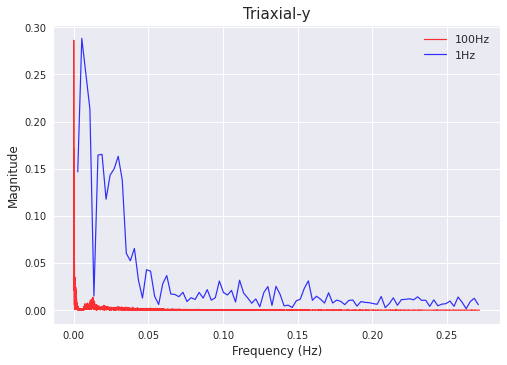

In [151]:
sns.set_style('darkgrid')
plt.plot(fftFreq_100_tri[mask_100][:10000],2.0*(np.abs(fft_triaxialy_100[mask_100][:10000])/n_100),linewidth=1.2,alpha=0.8,color='red',label="100Hz")
plt.plot(fftFreq_1_tri[mask_1][:100],2.0*(np.abs(fft_triaxialy_1[mask_1][:100])/n_1),linewidth=1.2,alpha=0.8,color='blue',label="1Hz")

locs, labels = plt.xticks()
# plt.xticks([])
plt.tick_params(axis='x', which='major', labelsize=10)
plt.tick_params(axis='y', which='major', labelsize=10)
plt.legend(fontsize=11)
plt.ylabel('Magnitude',fontsize=12)
plt.xlabel('Frequency (Hz)',fontsize=12)
plt.title('Triaxial-y',fontsize=15)
plt.savefig('img2/fft_tri.png')
plt.show()

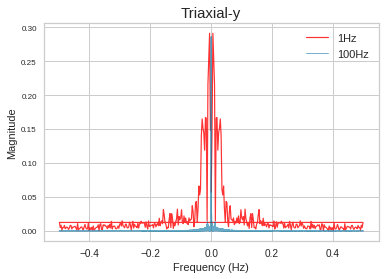

In [242]:
plt.plot(fftFreq_1_tri,2*(np.abs((fft_triaxialy_1)/365)),linewidth=1.2,alpha=0.8,color='red',label="1Hz")
plt.plot(fftFreq_100_tri,2*(np.abs(fft_triaxialy_100)/36786),linewidth=0.9,alpha=0.6,label="100Hz")
locs, labels = plt.xticks()
# plt.xticks([])
plt.tick_params(axis='y', which='major', labelsize=8)
plt.legend(fontsize=11)
plt.ylabel('Magnitude')
plt.xlabel('Frequency (Hz)')
plt.title('Triaxial-y',fontsize=15)
# plt.savefig('img2/triaxialy.png')
plt.show()


In [141]:
triaxialz_100 = np.array(triaxial_100['triaxial-z'])

In [142]:
fft_triaxialz_100 = np.fft.fft(triaxialz_100)

In [143]:
triaxialz_1 = np.array(triaxial_1['triaxial-z'])

In [144]:
fft_triaxialz_1 = np.fft.fft(triaxialz_1)

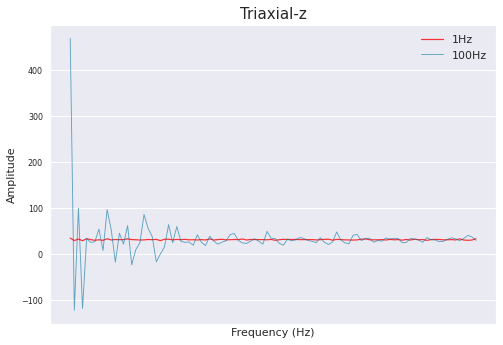

In [115]:
sns.set_style('darkgrid')
plt.plot(fft_triaxialz_1[:100],linewidth=1.2,alpha=0.8,color='red',label="1Hz")
plt.plot(fft_triaxialz_100[:100],linewidth=0.9,alpha=0.6,label="100Hz")
locs, labels = plt.xticks()
plt.xticks([])
plt.tick_params(axis='y', which='major', labelsize=8)
plt.legend(fontsize=11)
plt.ylabel('Magnitude')
plt.xlabel('Frequency (Hz)')
plt.title('Triaxial-z',fontsize=15)
# plt.grid()
plt.show()
# fig.savefig('img2/correlacao_nadal_rodeiro1_real.png')

In [145]:
mola_100_ = np.array(mola['s1_mola1'])

In [146]:
fft_mola_100 = fft(mola_100_)

In [147]:
mola_1_ = np.array(mola_1['s1_mola1'])

In [148]:
fft_mola_1 = fft(mola_1_)

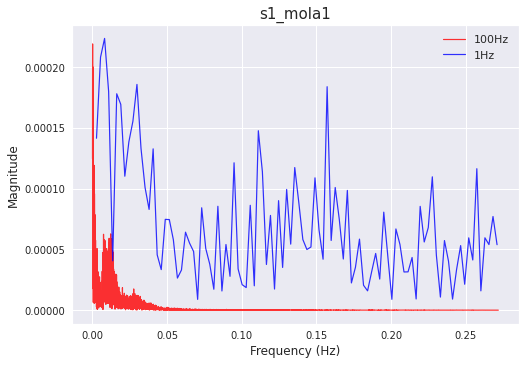

In [152]:
# plt.plot(fftFreq_100_tri,2*(np.abs((fft_mola_100)/36786)),linewidth=0.9,alpha=0.6,label="100Hz")
# plt.plot(fftFreq_1_tri,2*(np.abs((fft_mola_1)/365)),linewidth=1.2,alpha=0.8,color='red',label="1Hz")
# locs, labels = plt.xticks()
# # plt.xticks([])
# plt.tick_params(axis='y', which='major', labelsize=8)
# plt.legend(fontsize=10)
# plt.title('s1_spring1',fontsize=15)
# plt.ylabel('Magnitude')
# plt.xlabel('Frequency (Hz)')
# # plt.savefig('img2/spring.png')
# plt.show()



sns.set_style('darkgrid')
plt.plot(fftFreq_100_tri[mask_100][:10000],2.0*(np.abs(fft_mola_100[mask_100][:10000])/n_100),linewidth=1.2,alpha=0.8,color='red',label="100Hz")
plt.plot(fftFreq_1_tri[mask_1][:100],2.0*(np.abs(fft_mola_1[mask_1][:100])/n_1),linewidth=1.2,alpha=0.8,color='blue',label="1Hz")

locs, labels = plt.xticks()
# plt.xticks([])
plt.tick_params(axis='x', which='major', labelsize=10)
plt.tick_params(axis='y', which='major', labelsize=10)
plt.legend(fontsize=11)
plt.ylabel('Magnitude',fontsize=12)
plt.xlabel('Frequency (Hz)',fontsize=12)
plt.title('s1_mola1',fontsize=15)
plt.savefig('img2/fft_mola.png')
plt.show()

## **EDA**

### correlação

In [105]:
nadal_100.columns

Index(['nadal_r1_esq', 'nadal_r2_esq', 'nadal_r1_dir', 'nadal_r2_dir'], dtype='object')

In [106]:
y_nadal_2_dir_100.describe()

count    36782.000000
mean         0.026996
std          0.032177
min         -0.061818
25%          0.007905
50%          0.019313
75%          0.058513
max          0.141985
Name: nadal_r2_dir, dtype: float64

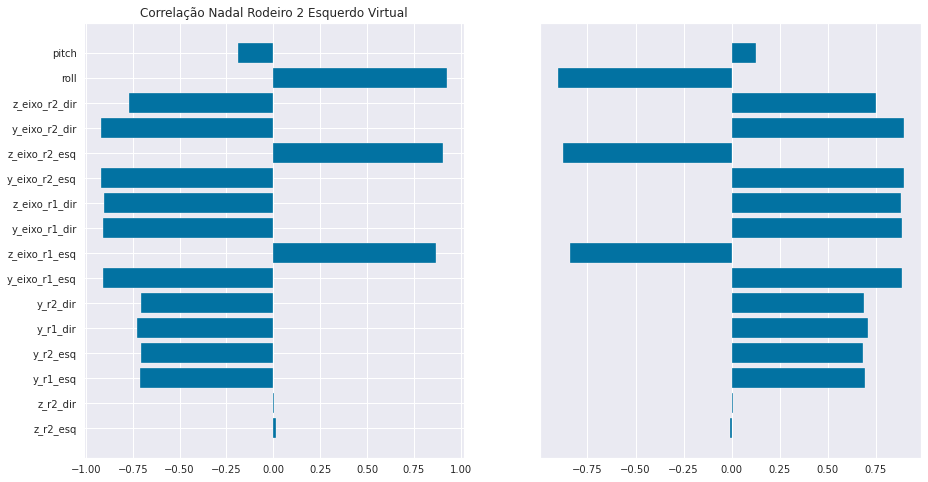

In [107]:
sns.set_style('darkgrid')
features = list(x_virtual_100.columns)

fig, ax = plt.subplots(1,2,figsize=(15,8))
plt.subplot(1,2,1)
visualizer = FeatureCorrelation(labels=features,title='Correlação Nadal Rodeiro 2 Esquerdo Virtual')
visualizer.fit(x_virtual_100, y_nadal_2_esq_100.squeeze())
plt.title("Correlação Nadal Rodeiro 2 Esquerdo Virtual")
plt.tick_params(axis='y', which='major', labelsize=10)
plt.subplot(1,2,2)
visualizer = FeatureCorrelation(labels=features,title='Correlação Nadal Rodeiro 2 Direito Virtual')
visualizer.fit(x_virtual_100, y_nadal_2_dir_100.squeeze())
plt.yticks([])
plt.show(visualizer)

#fig.savefig('img/correlacao_nadal_rodeiro2_virtual.png')

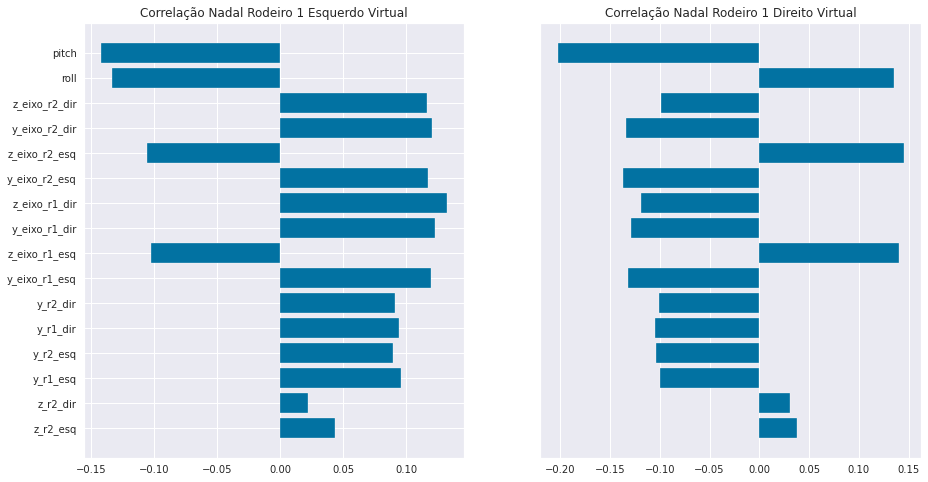

In [108]:
sns.set_style('darkgrid')
features = list(x_virtual_100.columns)

fig, ax = plt.subplots(1,2,figsize=(15,8))
plt.subplot(1,2,1)
visualizer = FeatureCorrelation(labels=features,title='Correlação Nadal Rodeiro 1 Esquerdo Virtual')
visualizer.fit(x_virtual_100, y_nadal_1_esq_100.squeeze())
plt.title("Correlação Nadal Rodeiro 1 Esquerdo Virtual")
plt.tick_params(axis='y', which='major', labelsize=10)
plt.subplot(1,2,2)
visualizer = FeatureCorrelation(labels=features,title='Correlação Nadal Rodeiro 1 Direito Virtual')
visualizer.fit(x_virtual_100, y_nadal_1_dir_100.squeeze())
plt.yticks([])

plt.title("Correlação Nadal Rodeiro 1 Direito Virtual")
plt.show(visualizer)

# fig.savefig('img/correlacao_nadal_rodeiro1_virtual.png')

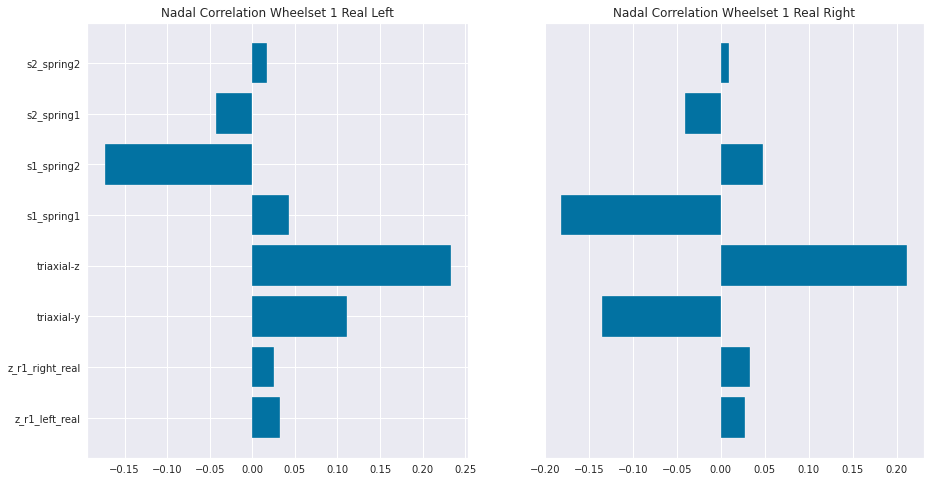

In [115]:
sns.set_style('darkgrid')
features = list(x_real_100.columns)

fig, ax = plt.subplots(1,2,figsize=(15,8))
plt.subplot(1,2,1)
visualizer = FeatureCorrelation(labels=['z_r1_left_real','z_r1_right_real','triaxial-y','triaxial-z','s1_spring1','s1_spring2','s2_spring1','s2_spring2'],title='Nadal Correlation Wheelset 1 Virtual Left')
visualizer.fit(x_real_100, y_nadal_1_esq_100.squeeze())
plt.title("Nadal Correlation Wheelset 1 Real Left")
plt.tick_params(axis='y', which='major', labelsize=10)
plt.subplot(1,2,2)
visualizer = FeatureCorrelation(labels=features,title='Nadal Correlation Wheelset 1 Real Right')
visualizer.fit(x_real_100, y_nadal_1_dir_100.squeeze())
plt.yticks([])

plt.title("Nadal Correlation Wheelset 1 Real Right")
plt.show(visualizer)

fig.savefig('img2/correlacao_nadal_rodeiro1_real.png')

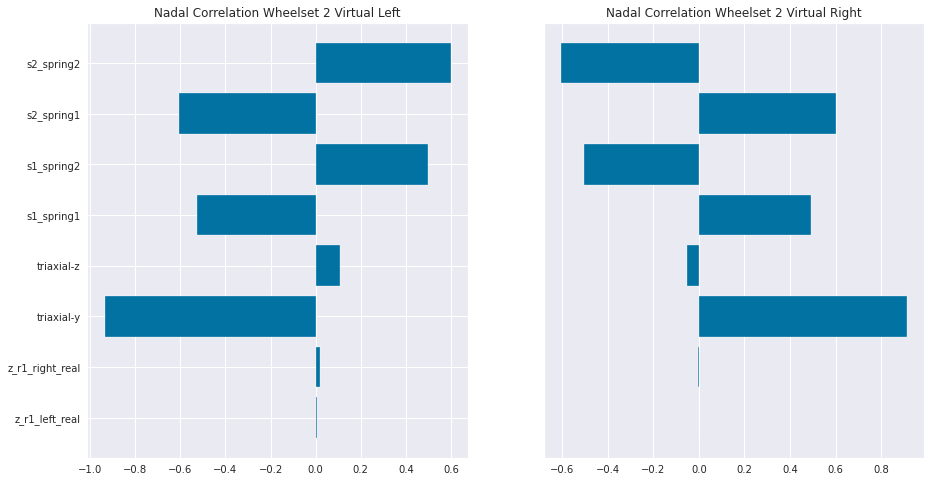

In [110]:
sns.set_style('darkgrid')
features = list(x_real_100.columns)

fig, ax = plt.subplots(1,2,figsize=(15,8))
plt.subplot(1,2,1)
visualizer = FeatureCorrelation(labels=['z_r1_left_real','z_r1_right_real','triaxial-y','triaxial-z','s1_spring1','s1_spring2','s2_spring1','s2_spring2'],title='Nadal Correlation Wheelset 2 Virtual Left')
visualizer.fit(x_real_100, y_nadal_2_esq_100.squeeze())
plt.title("Nadal Correlation Wheelset 2 Virtual Left")
plt.tick_params(axis='y', which='major', labelsize=10)
plt.subplot(1,2,2)
visualizer = FeatureCorrelation(labels=features,title='Nadal Correlation Wheelset 1 Virtual Right')
visualizer.fit(x_real_100, y_nadal_2_dir_100.squeeze())
plt.yticks([])

plt.title("Nadal Correlation Wheelset 2 Virtual Right")
plt.show(visualizer)

# fig.savefig('img2/correlacao_nadal_rodeiro2_real.png')

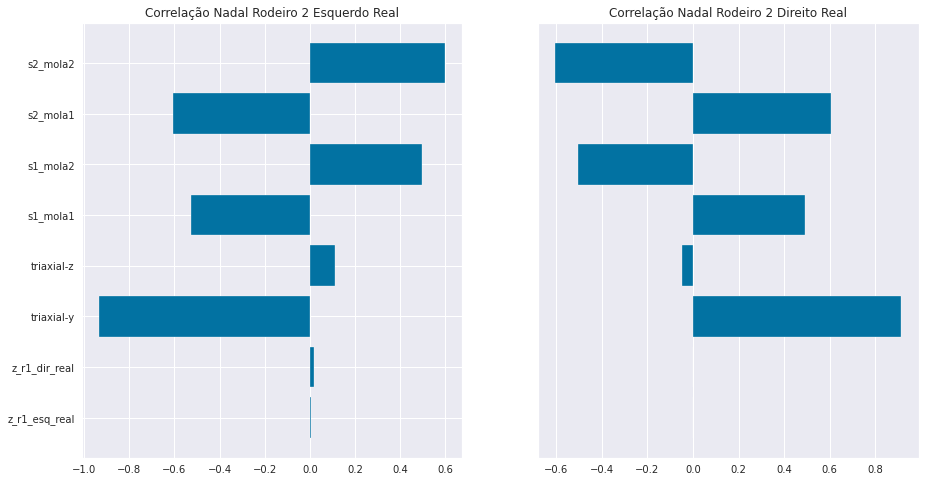

In [111]:
sns.set_style('darkgrid')
features = list(x_real_100.columns)

fig, ax = plt.subplots(1,2,figsize=(15,8))
plt.subplot(1,2,1)
visualizer = FeatureCorrelation(labels=features,title='Correlação Nadal Rodeiro 2 Esquerdo Real')
visualizer.fit(x_real_100, y_nadal_2_esq_100.squeeze())
plt.title("Correlação Nadal Rodeiro 2 Esquerdo Real")
plt.tick_params(axis='y', which='major', labelsize=10)
plt.subplot(1,2,2)
visualizer = FeatureCorrelation(labels=features,title='Correlação Nadal Rodeiro 2 Direito Real')
visualizer.fit(x_real_100, y_nadal_2_dir_100.squeeze())
plt.yticks([])

plt.title("Correlação Nadal Rodeiro 2 Direito Real")
plt.show(visualizer)

#fig.savefig('img/correlacao_nadal_rodeiro2_real.png')

### Sensores

In [ ]:
x_tudo_100.columns

<Figure size 576x396 with 0 Axes>

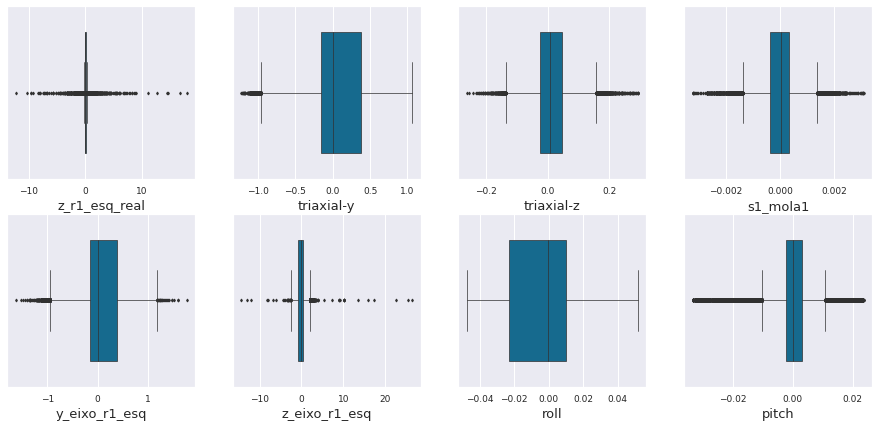

In [253]:
i = 0
sns.set_style('darkgrid')
plt.figure()
fig, ax = plt.subplots(2,4,figsize=(15.5,7))

for col in ['z_r1_esq_real','triaxial-y','triaxial-z','s1_mola1','y_eixo_r1_esq','z_eixo_r1_esq','roll','pitch']:
    i+=1
    plt.subplot(2,4,i)
    sns.boxplot(x_tudo_100[col],width=0.7,fliersize=2,linewidth=0.7,whis=1.5)
    plt.xlabel(col, fontsize=13)
    locs, labels = plt.xticks()
    plt.tick_params(axis='x', which='major', labelsize=9)
    plt.tick_params(axis='y', which='major', labelsize=9)
#fig.savefig('img/box_tudo.png')
plt.show()

<Figure size 576x396 with 0 Axes>

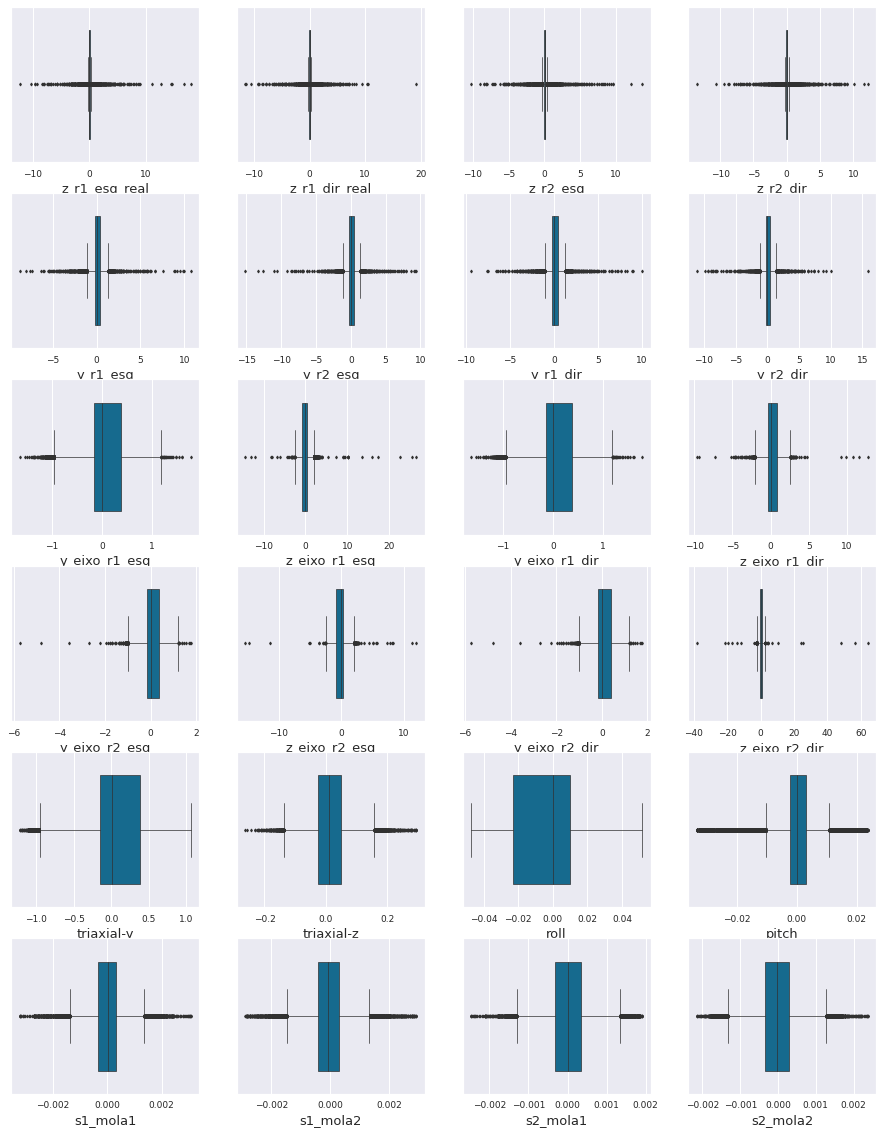

In [262]:
i = 0
sns.set_style('darkgrid')
plt.figure()
fig, ax = plt.subplots(6,4,figsize=(15.5,20))
colunas = x_tudo_100.columns
for col in colunas:
    i+=1
    plt.subplot(6,4,i)
    sns.boxplot(x_tudo_100[col],width=0.7,fliersize=2,linewidth=0.7,whis=1.5)
    plt.xlabel(col, fontsize=13)
    locs, labels = plt.xticks()
    plt.tick_params(axis='x', which='major', labelsize=9)
    plt.tick_params(axis='y', which='major', labelsize=9)
fig.savefig('img/box_all.png')
plt.show()

<Figure size 576x396 with 0 Axes>

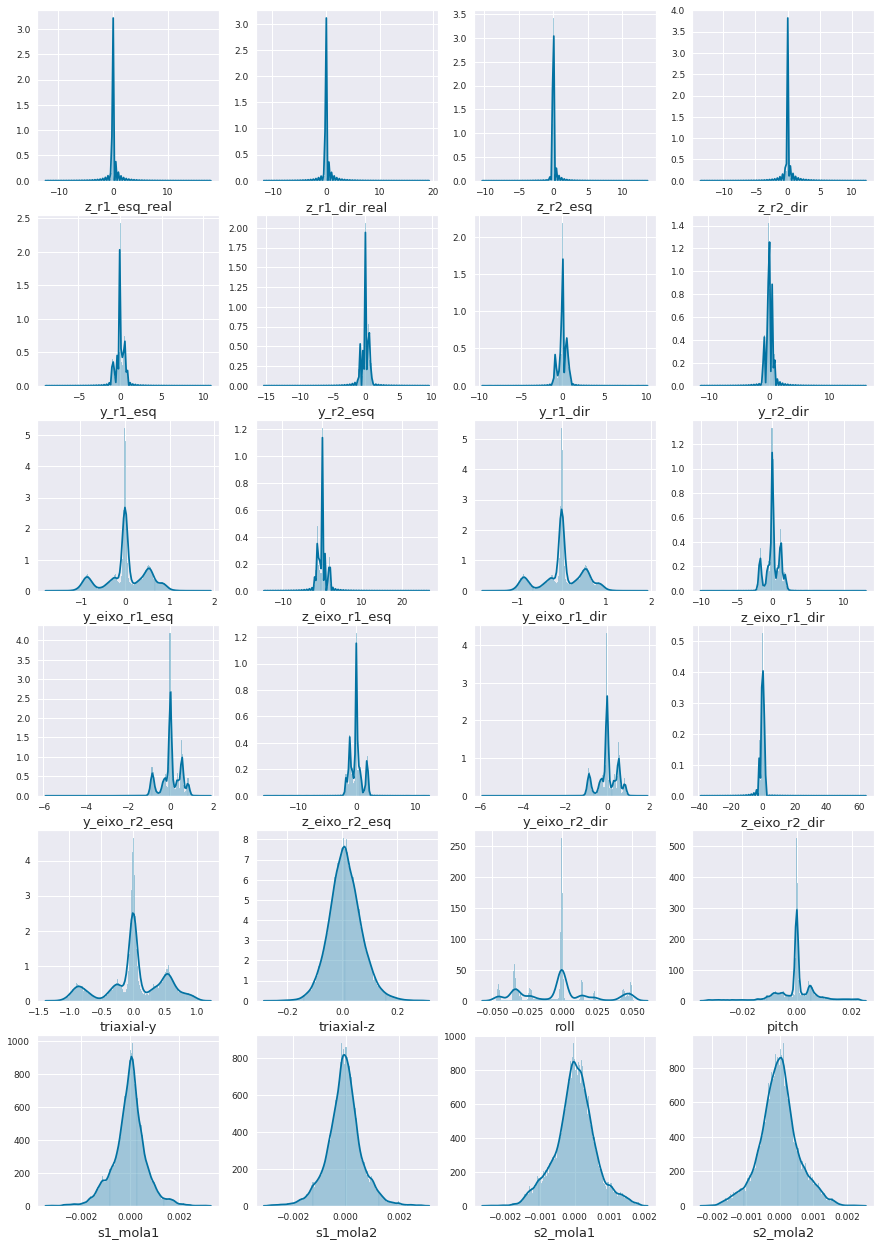

In [260]:
i = 0
sns.set_style('darkgrid')
plt.figure()
fig, ax = plt.subplots(6,4,figsize=(15,22))
colunas = x_tudo_100.columns
for col in colunas:
    i+=1
    plt.subplot(6,4,i)
    sns.distplot(x_tudo_100[col],bins=150)
    plt.xlabel(col, fontsize=13)
    locs, labels = plt.xticks()
    plt.tick_params(axis='x', which='major', labelsize=9)
    plt.tick_params(axis='y', which='major', labelsize=9)
fig.savefig('img/histograma_all.png')
plt.show()

<Figure size 576x396 with 0 Axes>

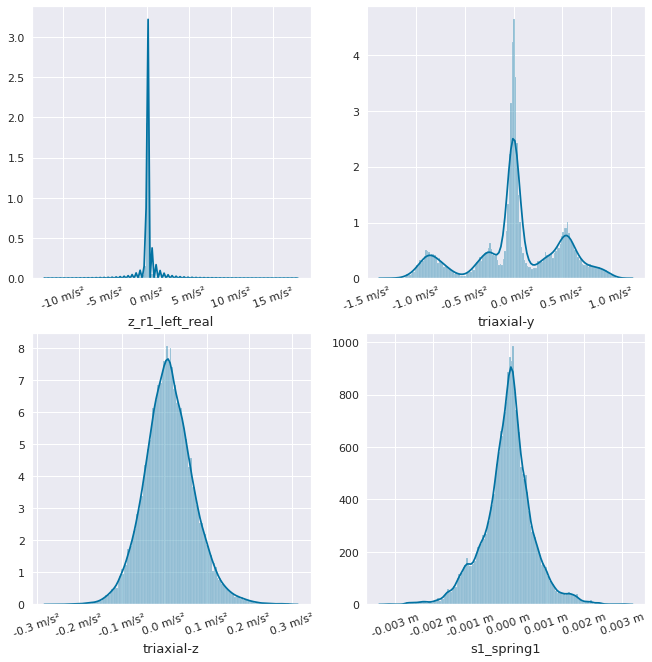

In [121]:
i = 0
sns.set_style('darkgrid')
plt.figure()
fig, ax = plt.subplots(2,2,figsize=(11,11))

for col in ['z_r1_esq_real','triaxial-y','triaxial-z','s1_mola1']:
    i+=1
    plt.subplot(2,2,i)
    sns.distplot(x_real_100[col],bins=150)
    if i == 1: 
        plt.xlabel('z_r1_left_real', fontsize=13)
        plt.xticks(rotation=20)
        plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.0f m/s²'))
    if i == 2: 
        plt.xlabel(col, fontsize=13)
        plt.xticks(rotation=20)
        plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f m/s²'))

    if i == 3: 
        plt.xlabel(col, fontsize=13)
        plt.xticks(rotation=20)
        plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f m/s²'))
    if i == 4: 
        plt.xlabel('s1_spring1', fontsize=13)
        plt.xticks(rotation=20)
        plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.3f m'))

    locs, labels = plt.xticks()
    plt.tick_params(axis='x', which='major', labelsize=11)
    plt.tick_params(axis='y', which='major', labelsize=11)
fig.savefig('img2/histograma_real.png')
plt.show()

<Figure size 576x396 with 0 Axes>

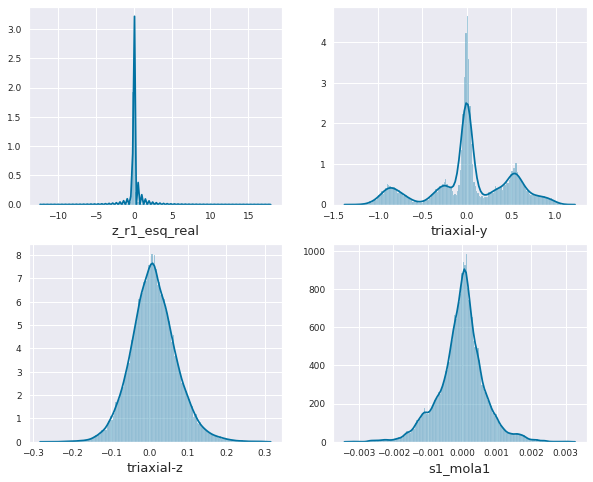

In [108]:
i = 0
sns.set_style('darkgrid')
plt.figure()
fig, ax = plt.subplots(2,2,figsize=(10,8))

for col in ['z_r1_esq_real','triaxial-y','triaxial-z','s1_mola1']:
    i+=1
    plt.subplot(2,2,i)
    sns.distplot(x_real_100[col],bins=150)
    plt.xlabel(col, fontsize=13)
    locs, labels = plt.xticks()
    plt.tick_params(axis='x', which='major', labelsize=9)
    plt.tick_params(axis='y', which='major', labelsize=9)
#fig.savefig('img/histograma_real.png')
plt.show()

### Heatmap

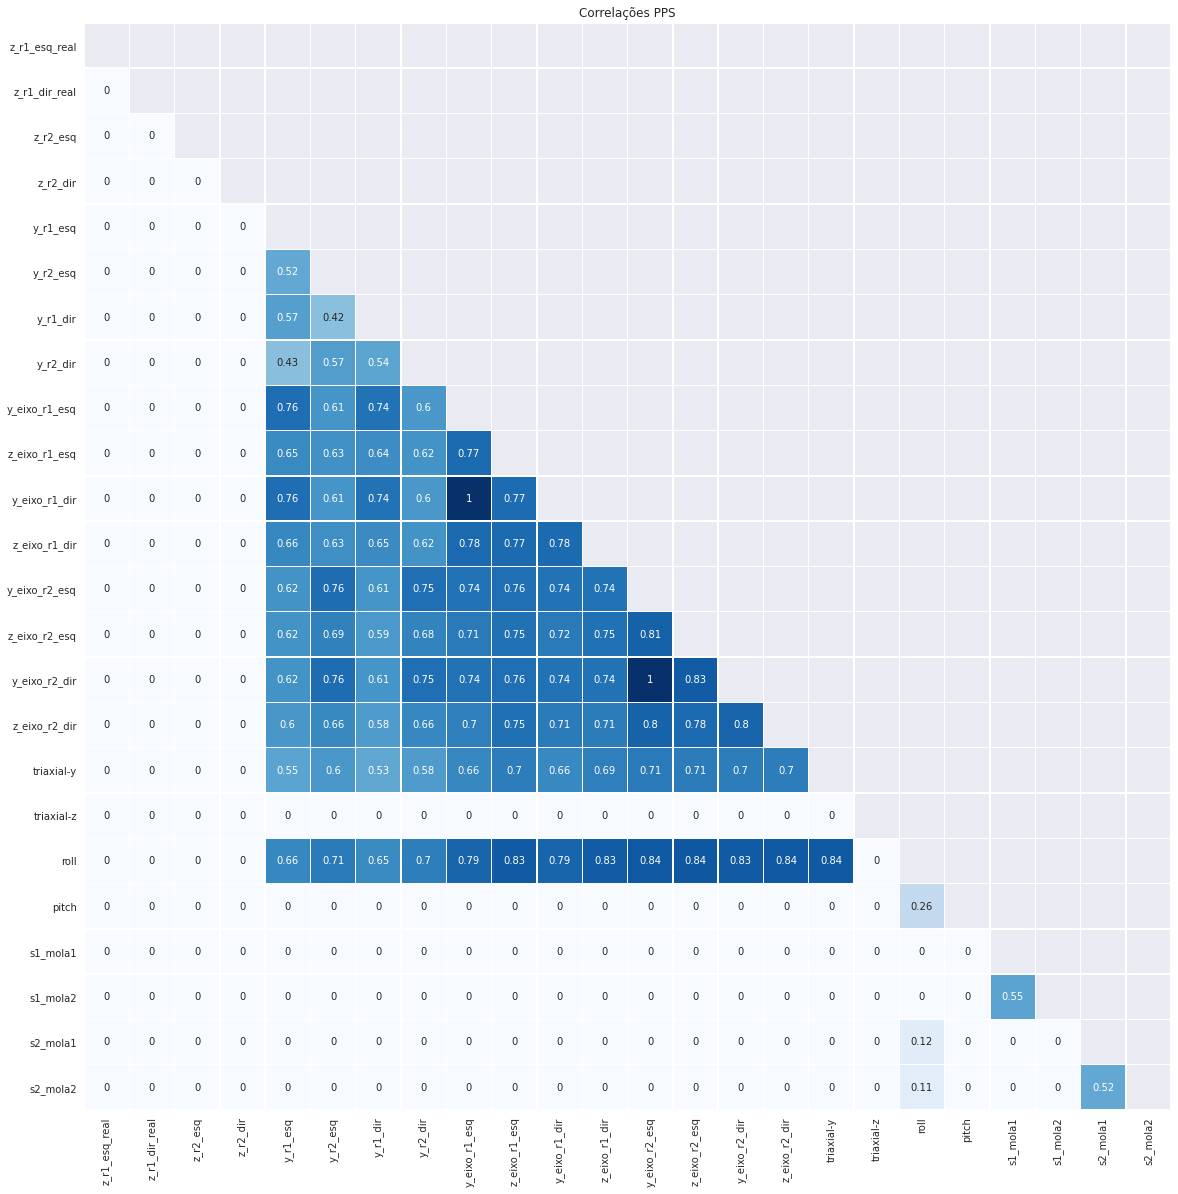

In [230]:
heat_pps(x_tudo_100)

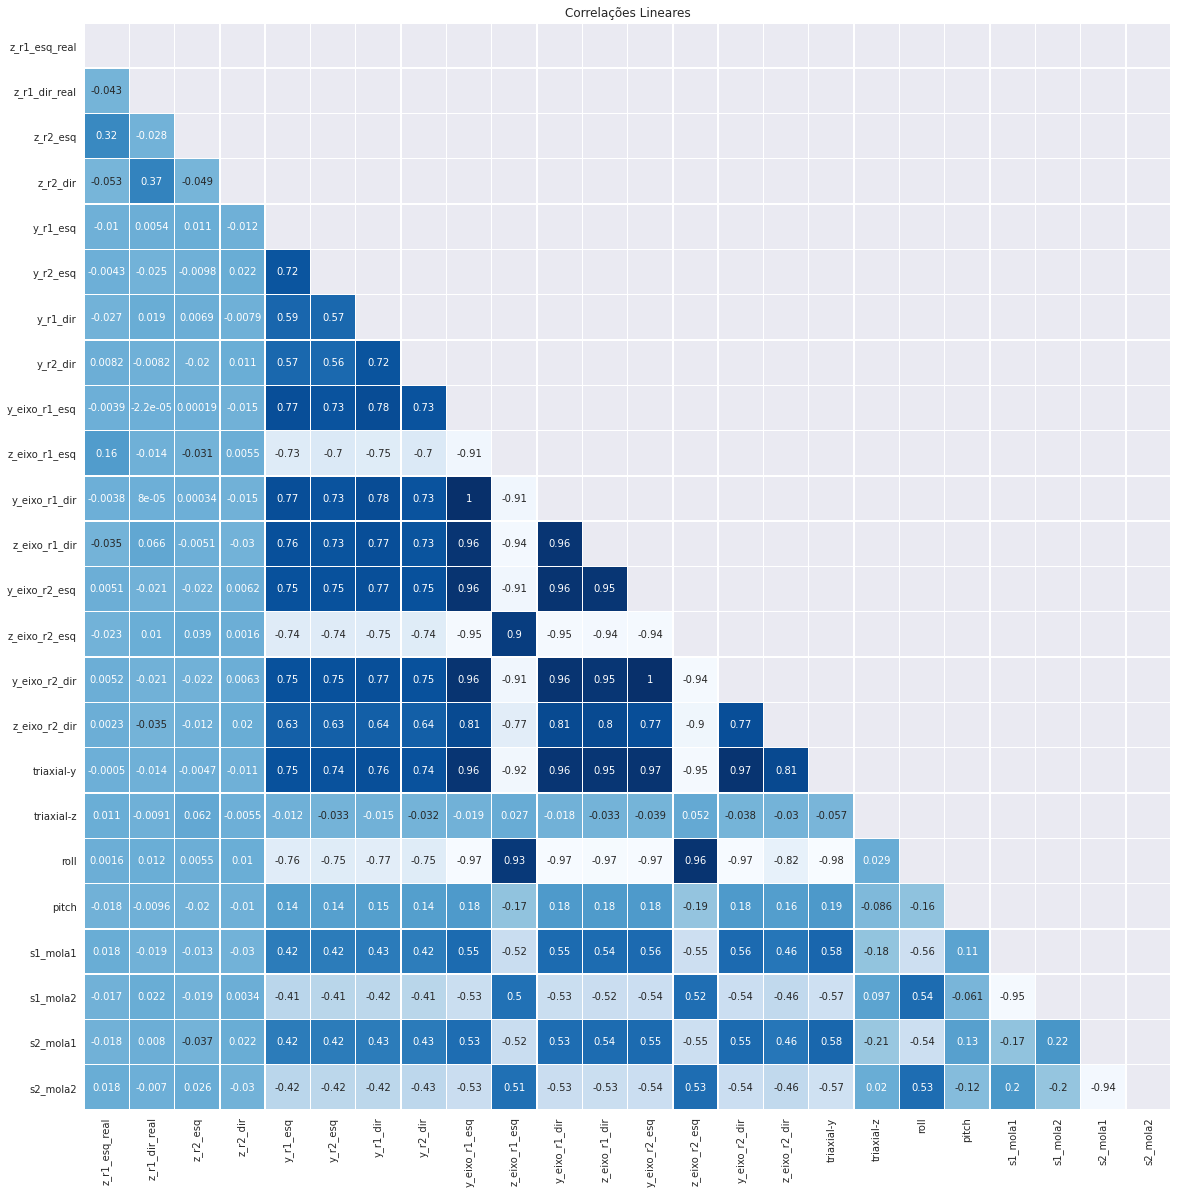

In [231]:
heat(x_tudo_100)

<function matplotlib.pyplot.show(*args, **kw)>

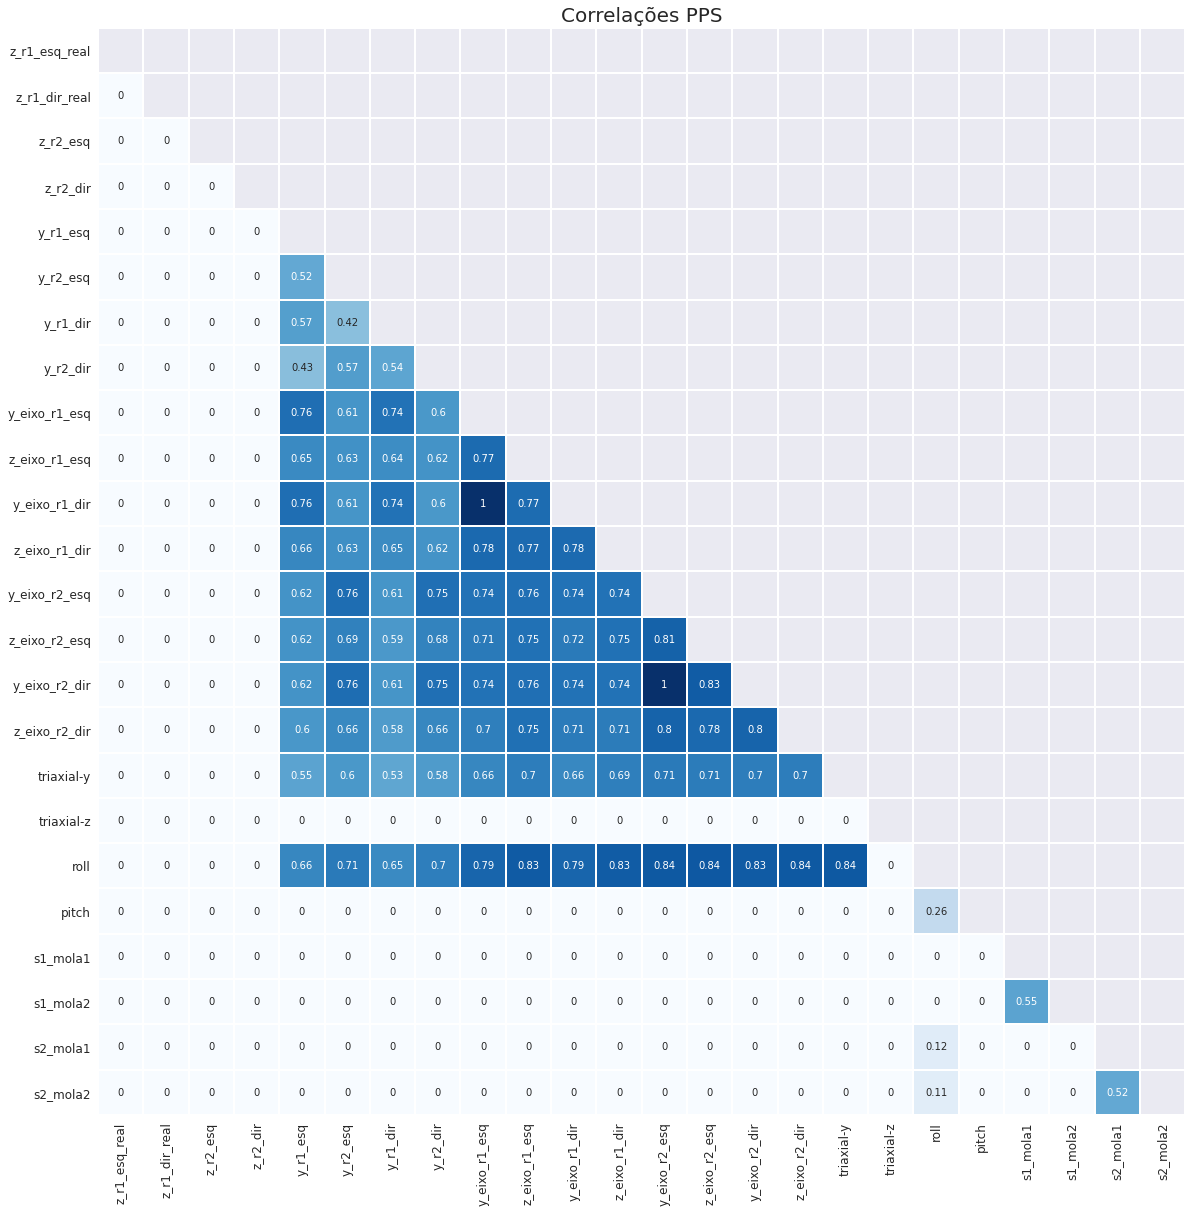

In [237]:
corr= pps.matrix(x_tudo_100)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig = plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap="Blues", linewidths=1, annot=True, annot_kws={"size":10},mask=mask,square=True,cbar=False, yticklabels=1)
plt.title('Correlações PPS',fontsize=20)
plt.tick_params(labelsize=12)
fig.savefig('img/correlacao_all_pps.png')
plt.show

In [ ]:
features=['z_r1_esq_real','y_eixo_r1_esq','z_eixo_r1_esq','triaxial-y','triaxial-z','s1_mola1','s1_mola2','roll','pitch']

In [ ]:
corr=x_tudo_100[features].corr()
#corr2 = pps.matrix(x_tudo_100[features])
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig,ax = plt.subplots (1,2,figsize=(20,10))
plt.subplot(1,2,1)
sns.heatmap(corr,cmap="Blues", linewidths=1, annot=True, annot_kws={"size":10},mask=mask,square=True,cbar=False, yticklabels=1)
plt.title('Correlações Lineares',fontsize=20)
plt.tick_params(labelsize=12)
plt.subplot(1,2,2)
sns.heatmap(corr2,cmap="Blues", linewidths=1, annot=True, annot_kws={"size":10},mask=mask,square=True,cbar=False, yticklabels=0)
plt.title('Correlações PPS',fontsize=20)
plt.tick_params(labelsize=12)
plt.show()
#fig.savefig('img/correlacoes.png')

In [ ]:
sns.set_style('white')
corr=x_tudo_100[features].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig=plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap="Blues", linewidths=1, annot=True, annot_kws={"size":10},mask=mask,square=True,cbar=False, xticklabels=1)
plt.title('Correlações Lineares',fontsize=20)
plt.tick_params(labelsize=12)
plt.show()
#fig.savefig('img/correlacao_lineares.png')


In [ ]:
corr = pps.matrix(x_tudo_100[features])
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig=plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap="Blues", linewidths=1, annot=True, annot_kws={"size":10},mask=mask,square=True,cbar=False)
plt.title('Correlações PPS',fontsize=20)
plt.tick_params(labelsize=12)
plt.show()
#fig.savefig('img/correlacao_pps.png')

### Lineplot

In [125]:
tempo = np.arange(0,364,0.0099727)

In [129]:
len(tempo)

36500

In [126]:
dist = np.arange(0,6272,0.17184)

In [127]:
dist2 = np.arange(0,6272,17.1845616)

In [128]:
len(dist2)

365

In [119]:
x_virtual_100_novo=x_virtual_100[282:]

In [120]:
x_real_100_novo=x_real_100[282:]

In [121]:
x_real_100_novo.shape

(36500, 8)

In [122]:
x_virtual_100_novo.shape

(36500, 16)

In [123]:
x_virtual_100.shape

(36782, 16)

In [141]:
x_virtual_100_tempo = x_virtual_100_novo.set_index(tempo)

In [142]:
x_real_100_tempo = x_real_100_novo.set_index(tempo)

In [151]:
y_nadal_1_esq_100_tempo = pd.DataFrame(y_nadal_1_esq_100[282:]).set_index(tempo)
y_nadal_1_dir_100_tempo = pd.DataFrame(y_nadal_1_dir_100[282:]).set_index(tempo)
y_nadal_2_esq_100_tempo = pd.DataFrame(y_nadal_2_esq_100[282:]).set_index(tempo)
y_nadal_2_dir_100_tempo = pd.DataFrame(y_nadal_2_dir_100[282:]).set_index(tempo)

In [160]:
y_nadal_1_esq_1_temp = pd.DataFrame(y_nadal_1_esq_1).set_index(dist2)

In [144]:
from matplotlib.ticker import FormatStrFormatter

In [149]:
len(y_nadal_2_dir_100_tempo)

36500

[<matplotlib.lines.Line2D at 0x7f6793534e50>]

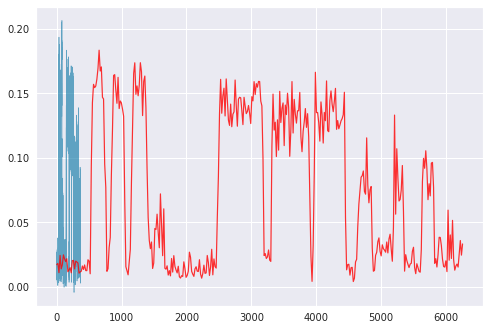

In [163]:
plt.plot(y_nadal_1_esq_100_tempo,linewidth=0.6,alpha=0.6,label="100Hz")
plt.plot(y_nadal_1_esq_1_temp,linewidth=1.2,alpha=0.8,color='red',label="1Hz")

In [146]:
len(y_nadal_2_dir_1)

365

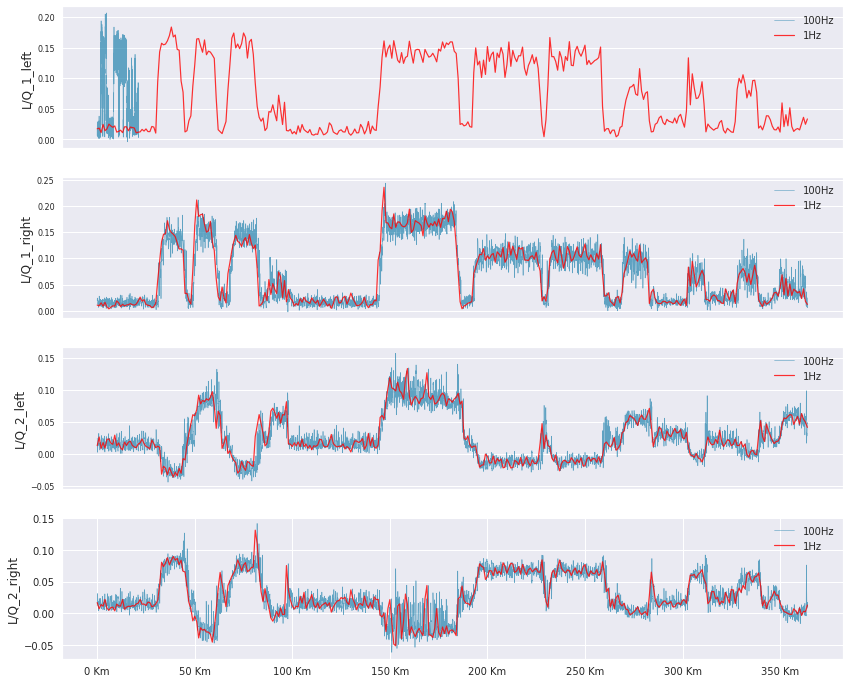

In [161]:
i = 0
sns.set_style('darkgrid')
plt.figure
fig, ax = plt.subplots(4,1,figsize=(14,12))

plt.subplot(4,1,1)
plt.plot(y_nadal_1_esq_100_tempo,linewidth=0.6,alpha=0.6,label="100Hz")
plt.plot(y_nadal_1_esq_1_temp,linewidth=1.2,alpha=0.8,color='red',label="1Hz")
plt.ylabel('L/Q_1_left', fontsize=12)
locs, labels = plt.xticks()
plt.xticks([])
plt.tick_params(axis='y', which='major', labelsize=8)
plt.legend(fontsize=10)

plt.subplot(4,1,2)
plt.plot(y_nadal_1_dir_100_tempo,linewidth=0.6,alpha=0.6,label="100Hz")
plt.plot(y_nadal_1_dir_1,linewidth=1.2,alpha=0.8,color='red',label="1Hz")
plt.ylabel('L/Q_1_right', fontsize=12)
locs, labels = plt.xticks()
plt.xticks([])
plt.tick_params(axis='y', which='major', labelsize=8)
plt.legend(fontsize=10)

plt.subplot(4,1,3)
plt.plot(y_nadal_2_esq_100_tempo,linewidth=0.6,alpha=0.6,label="100Hz")
plt.plot(y_nadal_2_esq_1,linewidth=1.2,alpha=0.8,color='red',label="1Hz")
plt.ylabel('L/Q_2_left', fontsize=12)
locs, labels = plt.xticks()
plt.xticks([])
plt.tick_params(axis='y', which='major', labelsize=8)
plt.legend(fontsize=10)

plt.subplot(4,1,4)
plt.plot(y_nadal_2_dir_100_tempo,linewidth=0.6,alpha=0.6,label="100Hz")
plt.plot(y_nadal_2_dir_1,linewidth=1.2,alpha=0.8,color='red',label="1Hz")
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d Km'))
plt.ylabel('L/Q_2_right', fontsize=12)
locs, labels = plt.xticks()
plt.tick_params(axis='x', which='major', labelsize=10)
plt.tick_params(axis='y', which='major', labelsize=10)
plt.legend(fontsize=10)

# fig.savefig('img2/line_nadal.png')
plt.show()

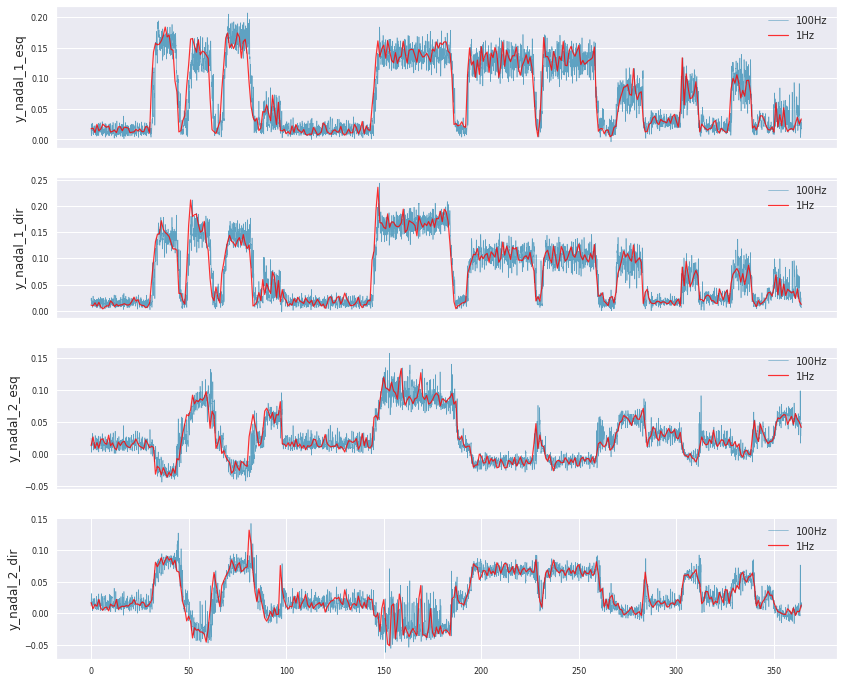

In [227]:
i = 0
sns.set_style('darkgrid')
plt.figure
fig, ax = plt.subplots(4,1,figsize=(14,12))

plt.subplot(4,1,1)
plt.plot(y_nadal_1_esq_100_tempo,linewidth=0.6,alpha=0.6,label="100Hz")
plt.plot(y_nadal_1_esq_1,linewidth=1.2,alpha=0.8,color='red',label="1Hz")
plt.ylabel('y_nadal_1_esq', fontsize=12)
locs, labels = plt.xticks()
plt.xticks([])
plt.tick_params(axis='y', which='major', labelsize=8)
plt.legend(fontsize=10)

plt.subplot(4,1,2)
plt.plot(y_nadal_1_dir_100_tempo,linewidth=0.6,alpha=0.6,label="100Hz")
plt.plot(y_nadal_1_dir_1,linewidth=1.2,alpha=0.8,color='red',label="1Hz")
plt.ylabel('y_nadal_1_dir', fontsize=12)
locs, labels = plt.xticks()
plt.xticks([])
plt.tick_params(axis='y', which='major', labelsize=8)
plt.legend(fontsize=10)

plt.subplot(4,1,3)
plt.plot(y_nadal_2_esq_100_tempo,linewidth=0.6,alpha=0.6,label="100Hz")
plt.plot(y_nadal_2_esq_1,linewidth=1.2,alpha=0.8,color='red',label="1Hz")
plt.ylabel('y_nadal_2_esq', fontsize=12)
locs, labels = plt.xticks()
plt.xticks([])
plt.tick_params(axis='y', which='major', labelsize=8)
plt.legend(fontsize=10)

plt.subplot(4,1,4)
plt.plot(y_nadal_2_dir_100_tempo,linewidth=0.6,alpha=0.6,label="100Hz")
plt.plot(y_nadal_2_dir_1,linewidth=1.2,alpha=0.8,color='red',label="1Hz")
plt.ylabel('y_nadal_2_dir', fontsize=12)
locs, labels = plt.xticks()
plt.tick_params(axis='x', which='major', labelsize=8)
plt.tick_params(axis='y', which='major', labelsize=8)
plt.legend(fontsize=10)

fig.savefig('img/line_nadal.png')
plt.show()

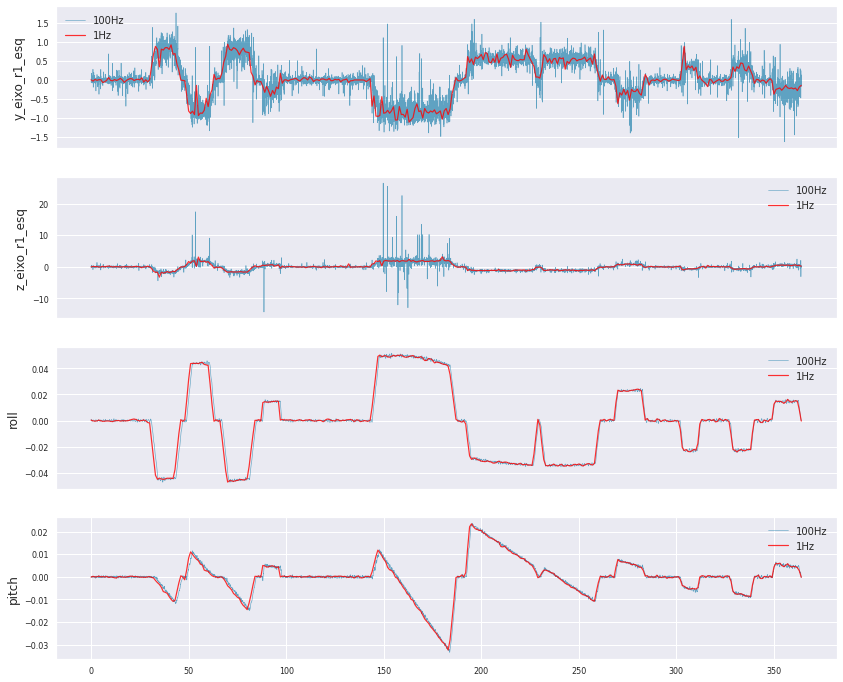

In [228]:
i = 0
sns.set_style('darkgrid')
plt.figure
fig, ax = plt.subplots(4,1,figsize=(14,12))
#fig.suptitle('Sensor Virtuais', fontsize=16)
for col in ['y_eixo_r1_esq','z_eixo_r1_esq','roll','pitch']:
    i+=1
    plt.subplot(4,1,i)
    plt.plot(x_virtual_100_tempo[col],linewidth=0.6,alpha=0.6,label="100Hz")
    plt.plot(x_virtual_1[col],linewidth=1.2,alpha=0.8,color='red',label="1Hz")
    #sns.lineplot(x=sensor_1.index,y=sensor_1[col],)
    plt.ylabel(col, fontsize=12)
    locs, labels = plt.xticks()
    if i == 4:
        plt.tick_params(axis='x', which='major', labelsize=8)
    else:
        plt.xticks([])
    plt.tick_params(axis='y', which='major', labelsize=8)  
    plt.legend(fontsize=10)


fig.savefig('img/line_virtual.png')
plt.show()

NameError: name 'x_real_100_tempo' is not defined

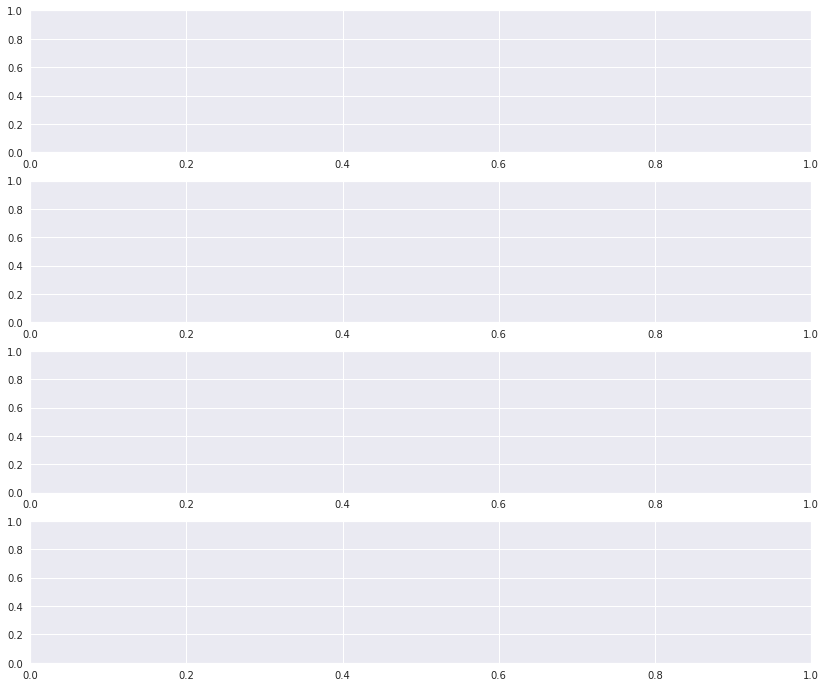

In [208]:
i = 0
sns.set_style('darkgrid')
plt.figure
fig, ax = plt.subplots(4,1,figsize=(14,12))
#fig.suptitle('Sensor Virtuais', fontsize=16)
for col in ['z_r1_esq_real','triaxial-y','triaxial-z','s1_mola1']:
    i+=1
    plt.subplot(4,1,i)
    plt.plot(x_real_100_tempo[col],linewidth=0.6,alpha=0.6,label="100Hz")
    plt.plot(x_real_1[col],linewidth=1.2,alpha=0.8,color='red',label="1Hz")
    #sns.lineplot(x=sensor_1.index,y=sensor_1[col],)
    if i == 1: 
        plt.ylabel('z_r1_left_real', fontsize=12)
        plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f m/s²'))
    if i == 2: 
        plt.ylabel(col, fontsize=12)
        plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f m/s²'))
    if i == 3: 
        plt.ylabel(col, fontsize=12)
        plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f m/s²'))
    if i == 4: 
        plt.ylabel('s1_spring1', fontsize=12)
        plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.3f m'))
    locs, labels = plt.xticks()
    if i == 4:
        plt.tick_params(axis='x', which='major', labelsize=10)
    else:
        plt.xticks([])
    plt.tick_params(axis='y', which='major', labelsize=10)  
    plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d Km'))
    
    plt.legend(fontsize=10)
# fig.savefig('img2/line_real.png')
plt.show()

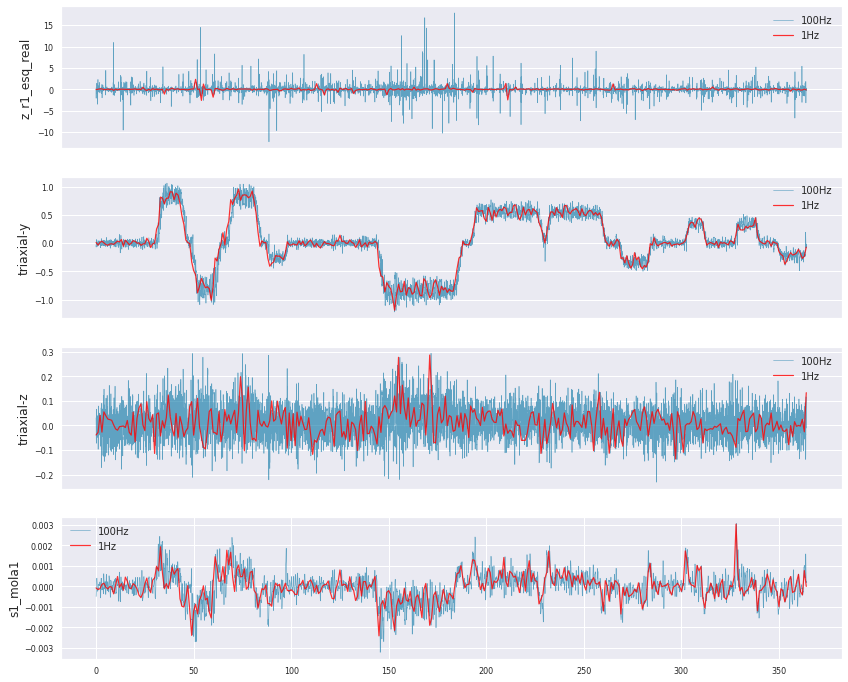

In [134]:
i = 0
sns.set_style('darkgrid')
plt.figure
fig, ax = plt.subplots(4,1,figsize=(14,12))
#fig.suptitle('Sensor Virtuais', fontsize=16)
for col in ['z_r1_esq_real','triaxial-y','triaxial-z','s1_mola1']:
    i+=1
    plt.subplot(4,1,i)
    plt.plot(x_real_100_tempo[col],linewidth=0.6,alpha=0.6,label="100Hz")
    plt.plot(x_real_1[col],linewidth=1.2,alpha=0.8,color='red',label="1Hz")
    #sns.lineplot(x=sensor_1.index,y=sensor_1[col],)
    plt.ylabel(col, fontsize=12)
    locs, labels = plt.xticks()
    if i == 4:
        plt.tick_params(axis='x', which='major', labelsize=8)
    else:
        plt.xticks([])
    plt.tick_params(axis='y', which='major', labelsize=8)  
    plt.legend(fontsize=10)
fig.savefig('img/line_real.png')
plt.show()

In [246]:
x_virtual_100_tempo.shape

(36500, 16)

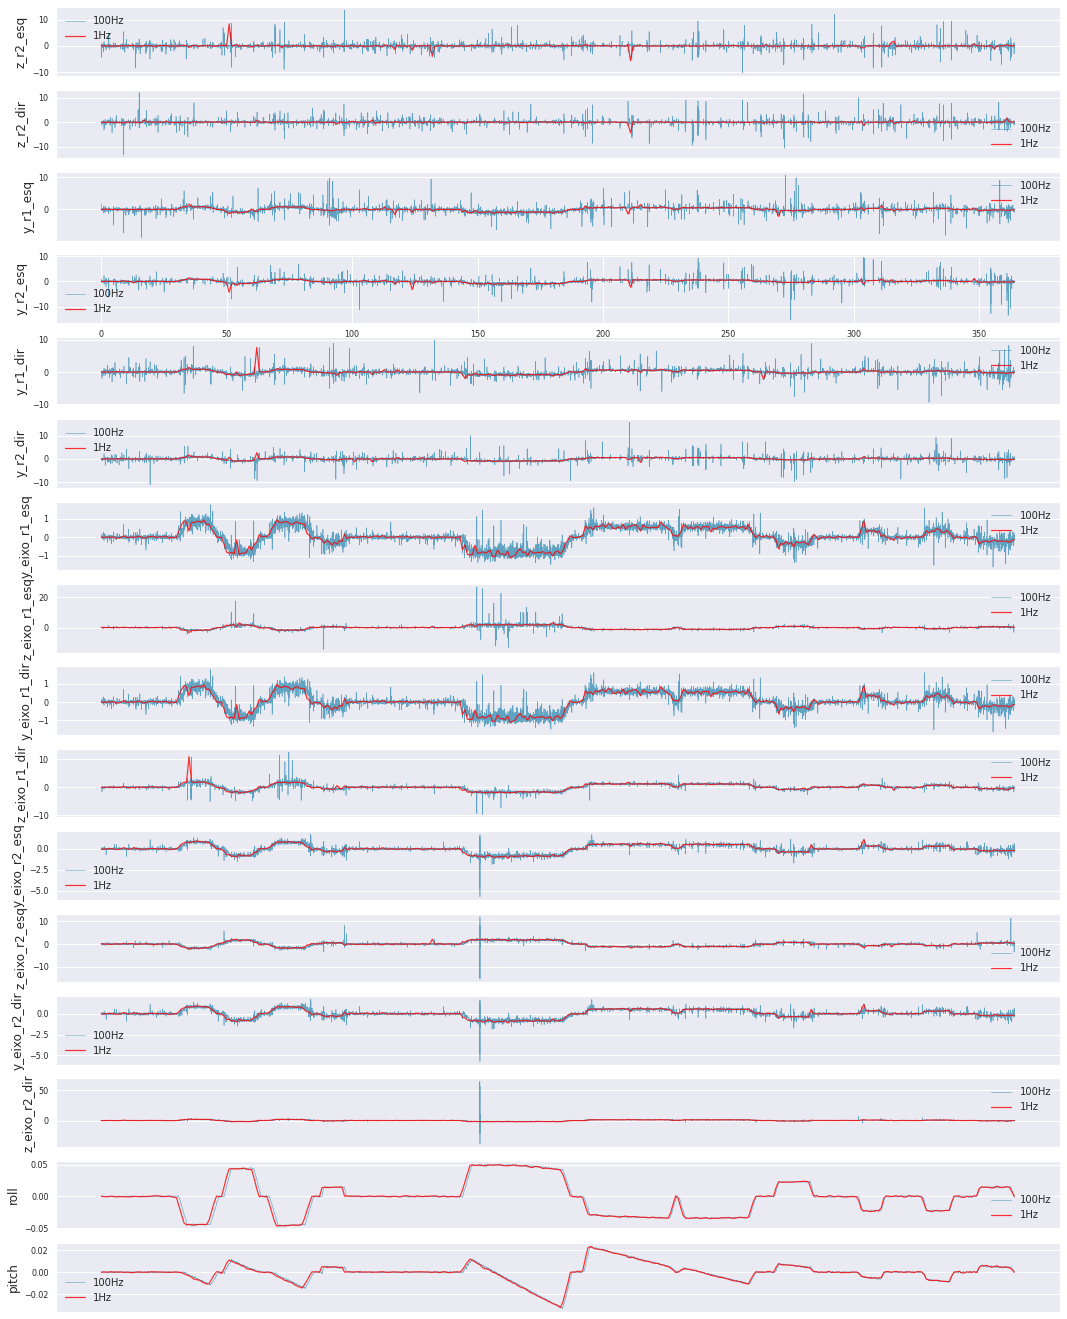

In [143]:
i = 0
sns.set_style('darkgrid')
plt.figure
fig, ax = plt.subplots(16,1,figsize=(18,24))
colunas = x_virtual_100_tempo.columns
#fig.suptitle('Sensor Virtuais', fontsize=16)
for col in colunas:
    i+=1
    plt.subplot(16,1,i)
    plt.plot(x_virtual_100_tempo[col],linewidth=0.6,alpha=0.6,label="100Hz")
    plt.plot(x_virtual_1[col],linewidth=1.2,alpha=0.8,color='red',label="1Hz")
    #sns.lineplot(x=sensor_1.index,y=sensor_1[col],)
    plt.ylabel(col, fontsize=12)
    locs, labels = plt.xticks()
    if i == 4:
        plt.tick_params(axis='x', which='major', labelsize=8)
    else:
        plt.xticks([])
    plt.tick_params(axis='y', which='major', labelsize=8)  
    plt.legend(fontsize=10)


fig.savefig('img/line_virtual_tudo.png')
plt.show()

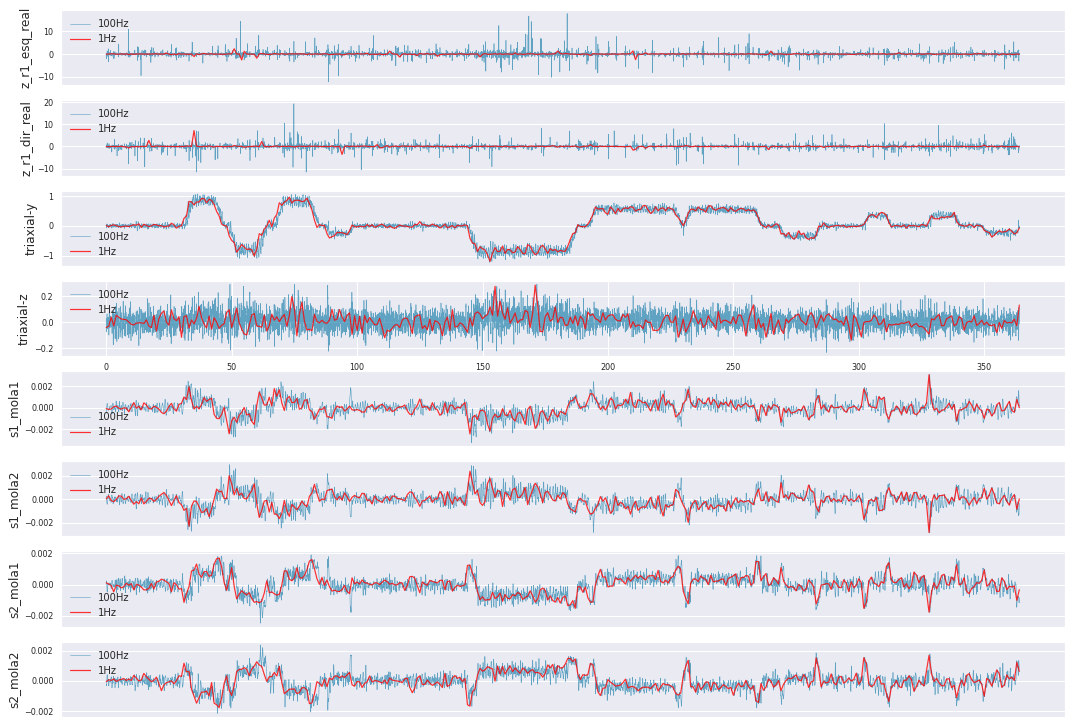

In [244]:
i = 0
sns.set_style('darkgrid')
plt.figure
fig, ax = plt.subplots(8,1,figsize=(18,13))
colunas = x_real_100_tempo.columns
#fig.suptitle('Sensor Virtuais', fontsize=16)
for col in colunas:
    i+=1
    plt.subplot(8,1,i)
    plt.plot(x_real_100_tempo[col],linewidth=0.6,alpha=0.6,label="100Hz")
    plt.plot(x_real_1[col],linewidth=1.2,alpha=0.8,color='red',label="1Hz")
    #sns.lineplot(x=sensor_1.index,y=sensor_1[col],)
    plt.ylabel(col, fontsize=12)
    locs, labels = plt.xticks()
    if i == 4:
        plt.tick_params(axis='x', which='major', labelsize=8)
    else:
        plt.xticks([])
    plt.tick_params(axis='y', which='major', labelsize=8)  
    plt.legend(fontsize=10)
fig.savefig('img/line_real_tudo.png')
plt.show()

## **Explicabilidades**

### SelectKbest

In [139]:
X_train_tudo,X_test_tudo,y_train_tudo,y_test_tudo=train_test_split(x_tudo_100,y_nadal_1_esq_100,test_size=0.3,random_state=42)

In [140]:
X_train_tudo.shape

(25747, 24)

In [141]:
k_vs_score=[]

for k in range(2,25,1):
    selector = SelectKBest(score_func=f_regression, k=k)
    X_new2 = selector.fit_transform(X_train_tudo,y_train_tudo)
    X_val = selector.transform(X_test_tudo)
    mdl = RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=0)
    mdl.fit(X_new2,y_train_tudo)
    p=mdl.predict(X_val)
    score= metric(y_test_tudo,p)
    print('k = {} '.format(k))
    
    k_vs_score.append(score)

MSE:0.00275030248450314 
MAE:0.04279874342477965 
R2:0.12721328688764644
k = 2 
MSE:0.0004279904970293823 
MAE:0.012440739918160327 
R2:0.8641806051333003
k = 3 
MSE:4.5283612136503284e-05 
MAE:0.00467746188310174 
R2:0.9856296043009198
k = 4 
MSE:5.543720846608898e-05 
MAE:0.005244700125534792 
R2:0.982407440914637
k = 5 


KeyboardInterrupt: 

In [177]:
k=10
selector6 = SelectKBest(score_func= f_regression, k=k)
X_new = selector6.fit_transform(x_tudo_100, y_nadal_2_esq_100)
x_tudo_100.loc[:, selector6.get_support()]

y_eixo_r1_esq  z_eixo_r1_esq  y_eixo_r1_dir  z_eixo_r1_dir  \
0      -8.348801e-10       0.023233  -8.348801e-10       0.023233   
1       3.261138e-09       0.018039   3.261138e-09       0.018039   
2      -2.294577e-09       0.014380  -2.294577e-09       0.014380   
3       4.003989e-09       0.010063   4.003989e-09       0.010063   
4       3.070201e-09       0.006024   3.070201e-09       0.006024   
...              ...            ...            ...            ...   
36777  -5.211422e-02       0.118580  -5.208234e-02      -0.127786   
36778  -3.508393e-02       0.093731  -3.505094e-02      -0.086787   
36779  -4.098731e-02       0.092957  -4.095439e-02      -0.117444   
36780  -3.634205e-02       0.093518  -3.630776e-02      -0.102470   
36781  -4.306578e-02       0.097475  -4.303128e-02      -0.128153   

       y_eixo_r2_esq  z_eixo_r2_esq  y_eixo_r2_dir  z_eixo_r2_dir  \
0       1.443145e-09       0.022771   1.443145e-09       0.022771   
1       2.156798e-09       0.018347   2.156798e-09       0.018347   
2       4.786236e-09       0.014060   4.786236e-09       0.014060   
3      -1.661204e-09       0.010403  -1.661204e-09       0.010403   
4      -1.520656e-09       0.005744  -1.520656e-09       0.005744   
...              ...            ...            ...            ...   
36777  -5.442471e-02       0.088066  -5.439190e-02      -0.177010   
36778  -4.639021e-02       0.082634  -4.635818e-02      -0.127466   
36779  -3.952199e-02       0.097563  -3.948854e-02      -0.109394   
36780  -4.907276e-02       0.097782  -4.903894e-02      -0.130389   
36781  -4.363769e-02       0.105799  -4.360304e-02      -0.118359   

         triaxial-y      roll  
0     -6.359391e-11  0.000000  
1     -2.135858e-11  0.000000  
2     -7.826106e-12  0.000000  
3     -7.163304e-12  0.000000  
4     -1.287853e-11  0.000000  
...             ...       ...  
36777 -3.963751e-02  0.000140  
36778 -5.075778e-02  0.000100  
36779 -6.200710e-02  0.000061  
36780 -7.359922e-02  0.000024  
36781 -8.422042e-02 -0.000014  

[36782 rows x 10 columns]

triaxial-z
0        0.191554
1        0.154754
2        0.112299
3        0.068071
4        0.021139
...           ...
36777    0.047984
36778    0.043929
36779    0.024553
36780    0.011663
36781   -0.010740

[36782 rows x 1 columns]

In [107]:
X_train_real,X_test_real,y_train_real,y_test_real=train_test_split(x_real_100,y_nadal_1_dir_100,test_size=0.3,random_state=42)

In [108]:
X_train_real.shape

(25747, 8)

In [109]:
k_vs_score=[]

for k in range(2,9,1):
    selector = SelectKBest(score_func=f_regression, k=k)
    X_new2 = selector.fit_transform(X_train_real,y_train_real)
    X_val = selector.transform(X_test_real)
    mdl = RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=0)
    mdl.fit(X_new2,y_train_real)
    p=mdl.predict(X_val)
    score= metric(y_test_real,p)
    print('k = {} '.format(k))
    
    k_vs_score.append(score)

MSE:0.0028697625846503144 
MAE:0.04342523504457454 
R2:0.07619785372494825
k = 2 
MSE:0.0002367450799817161 
MAE:0.010226001962168559 
R2:0.9237896492981779
k = 3 
MSE:0.00018534920583968554 
MAE:0.008924539206123879 
R2:0.9403344391341202
k = 4 
MSE:0.0001261294842539996 
MAE:0.007067386522154645 
R2:0.9593977951745412
k = 5 
MSE:0.00012380834436463231 
MAE:0.007077403337037655 
R2:0.9601449907868442
k = 6 
MSE:0.0001234644594289633 
MAE:0.007108212119824214 
R2:0.9602556904117338
k = 7 
MSE:0.00011008677857496561 
MAE:0.006563888403435652 
R2:0.9645620850769954
k = 8 


In [162]:
k=2
selector6 = SelectKBest(score_func= f_regression, k=k)
X_new = selector6.fit_transform(x_real_100, y_nadal_1_dir_100)
x_real_100.loc[:, selector6.get_support()]

triaxial-z  s1_mola1
0        0.191554 -0.000837
1        0.154754 -0.000737
2        0.112299 -0.000621
3        0.068071 -0.000501
4        0.021139 -0.000372
...           ...       ...
36777    0.047984  0.000177
36778    0.043929  0.000187
36779    0.024553  0.000205
36780    0.011663  0.000227
36781   -0.010740  0.000249

[36782 rows x 2 columns]

triaxial-z  s1_mola2
0        0.191554 -0.000837
1        0.154754 -0.000737
2        0.112299 -0.000621
3        0.068071 -0.000501
4        0.021139 -0.000372
...           ...       ...
36777    0.047984 -0.000764
36778    0.043929 -0.000657
36779    0.024553 -0.000553
36780    0.011663 -0.000452
36781   -0.010740 -0.000358

[36782 rows x 2 columns]

### Explicabilidade

#### Shap

In [107]:
X_train_vagao,X_test_vagao,y_train_vagao,y_test_vagao=train_test_split(x_real_100,y_nadal_1_esq_100,test_size=0.3)

In [108]:
X_train_vagao.shape

(25747, 8)

In [109]:
selector = SelectKBest(score_func=f_regression, k=8)
X_new2 = pd.DataFrame(selector.fit_transform(X_train_vagao,y_train_vagao))
X_val = pd.DataFrame(selector.transform(X_test_vagao))
#X_val.columns=X_train_tudo.loc[:, selector.get_support()].columns
#X_new2.columns=X_train_tudo.loc[:, selector.get_support()].columns
mdl = XGBRegressor(n_estimators=100,n_jobs=-1,random_state=0)
mdl.fit(X_new2,y_train_vagao)
p=mdl.predict(X_val)
score= mean_squared_error(y_test_vagao,p)

print('MAE {}'.format(score))

MAE 0.000169845919828093


In [110]:
X_val.columns=x_real_100.loc[:, selector.get_support()].columns
explainer = shap.TreeExplainer(mdl)
shap_values = explainer.shap_values(X_val)

In [111]:
X_val.iloc[2000,:]

z_r1_esq_real    0.233333
z_r1_dir_real   -0.040200
triaxial-y      -1.063679
triaxial-z      -0.005135
s1_mola1        -0.001369
s1_mola2         0.001161
s2_mola1        -0.000807
s2_mola2         0.000942
Name: 2000, dtype: float64

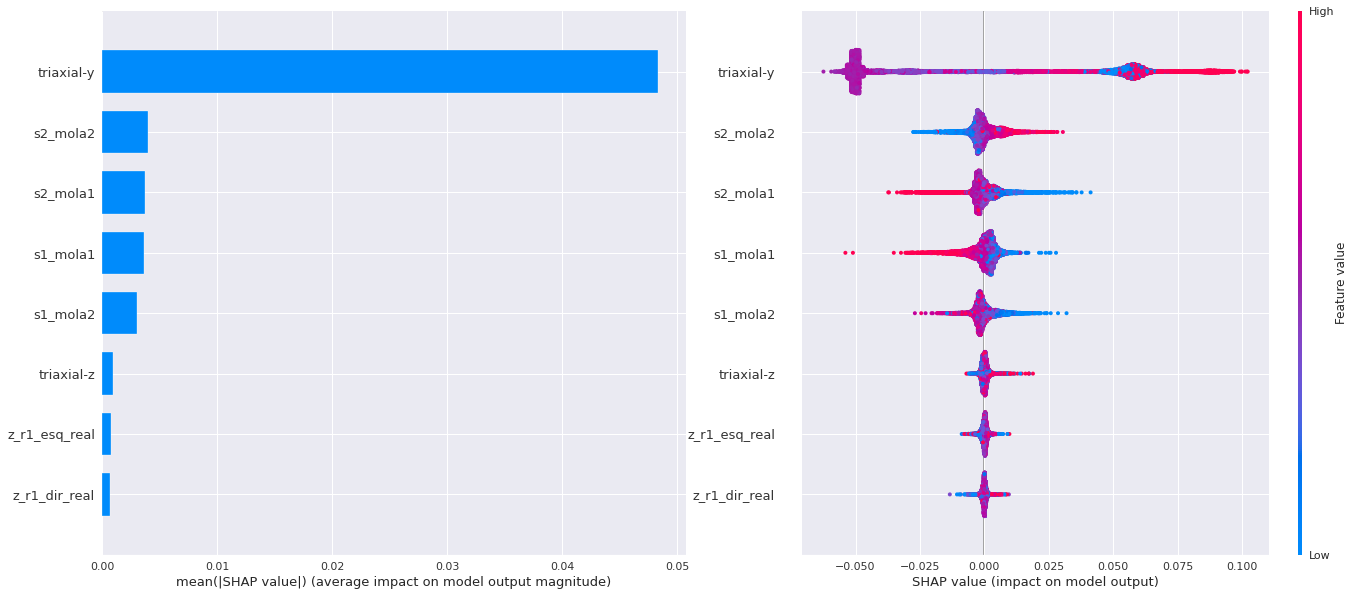

In [177]:
plt.subplot(1,2,1)
shap.summary_plot(shap_values, X_val, plot_type="bar",alpha=0.8,show=False)
plt.subplot(1,2,2)
shap.summary_plot(shap_values, X_val,plot_size=(23,10),show=False)
#plt.savefig('img/shap_virtual_r2_esq.png')

**testing**

In [178]:
mdl = XGBRegressor(n_estimators=100,n_jobs=-1,random_state=0)
mdl.fit(x_real_100,y_nadal_1_esq_100)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [179]:
explainer = shap.TreeExplainer(mdl)
shap_values = explainer.shap_values(x_real_100)

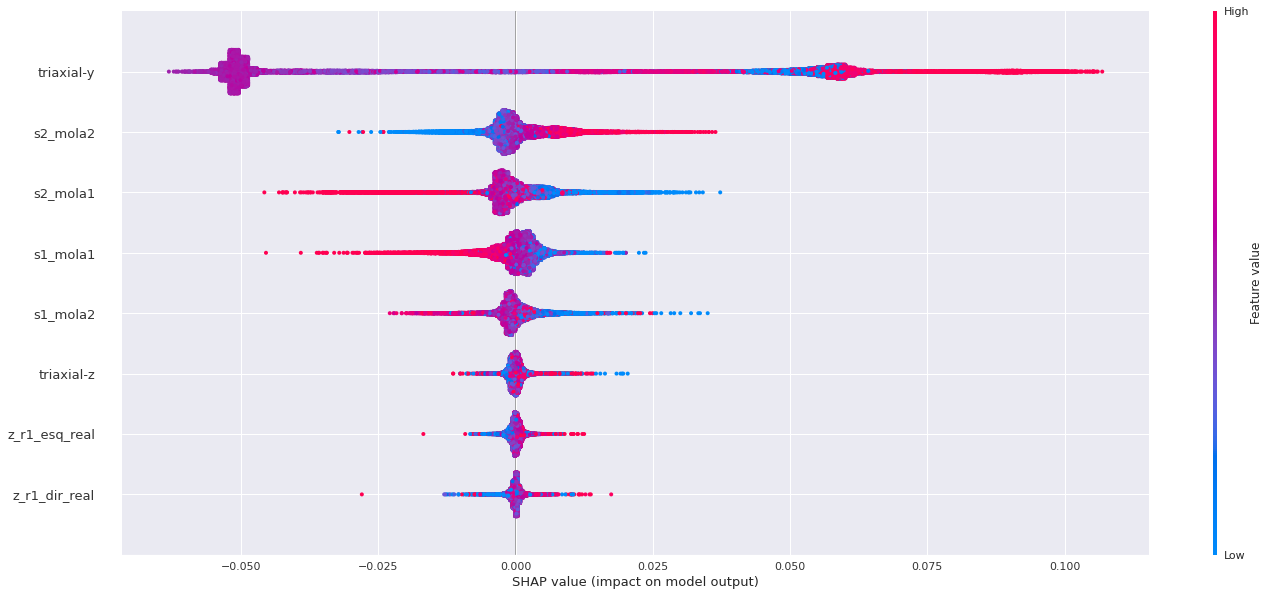

In [180]:
shap.summary_plot(shap_values, x_real_100,plot_size=(23,10),show=False)

The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue (these force plots are introduced in our Nature BME paper).

In [114]:
y_nadal_1_esq_100.iloc[2000]

0.011730686761438847

In [185]:
shap.initjs()

In [113]:
shap.force_plot(explainer.expected_value, shap_values[2000,:], x_real_100.iloc[2000,:],out_names='L/Q Wheelset 1 Left',text_rotation=20,figsize=(18,3),show=True,feature_names=['z_r1_left_real','z_r1_right_real','triaxial-y','triaxial-z','s1_spring1','s1_spring2','s2_spring1','s2_spring2'])
#plt.savefig('img/test.png')

In [115]:
shap.force_plot(explainer.expected_value, shap_values[8315,:], x_real_100.iloc[8315,:],out_names='L/Q Wheelset 1 Left',text_rotation=20,figsize=(18,3),show=True,feature_names=['z_r1_left_real','z_r1_right_real','triaxial-y','triaxial-z','s1_spring1','s1_spring2','s2_spring1','s2_spring2'])



#### YellowBricks

In [119]:
X_train_tudo,X_test_tudo,y_train_tudo,y_test_tudo=train_test_split(x_real_100,y_nadal_1_esq_100,test_size=0.3)

In [120]:
selector = SelectKBest(score_func=f_regression, k=8)
X_new2 = pd.DataFrame(selector.fit_transform(X_train_tudo,y_train_tudo))
X_val = pd.DataFrame(selector.transform(X_test_tudo))
X_val.columns=X_train_tudo.loc[:, selector.get_support()].columns
X_new2.columns=X_train_tudo.loc[:, selector.get_support()].columns
mdl = RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=0)
mdl.fit(X_new2,y_train_tudo)
p=mdl.predict(X_val)
score= mean_squared_error(y_test_tudo,p)

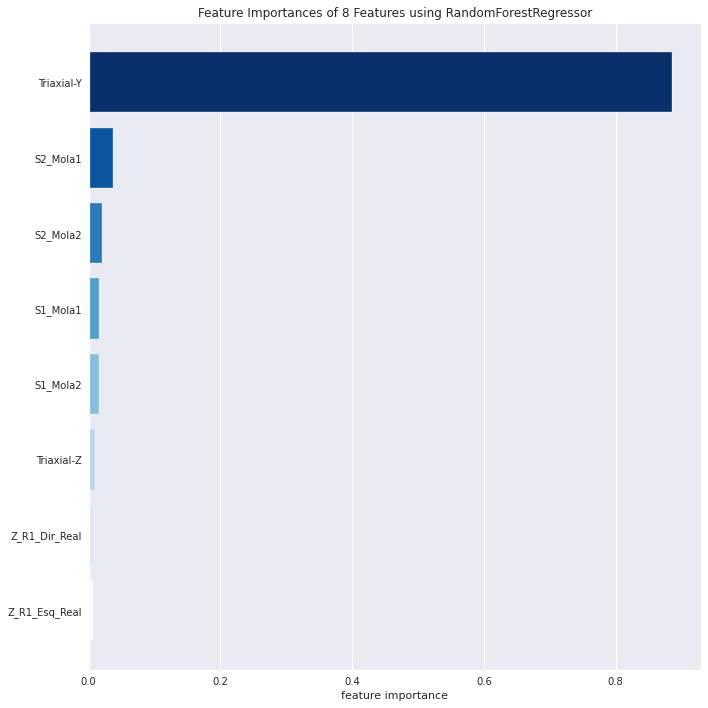

In [121]:
feature_importance(mdl,X_new2,X_val)
plt.show()

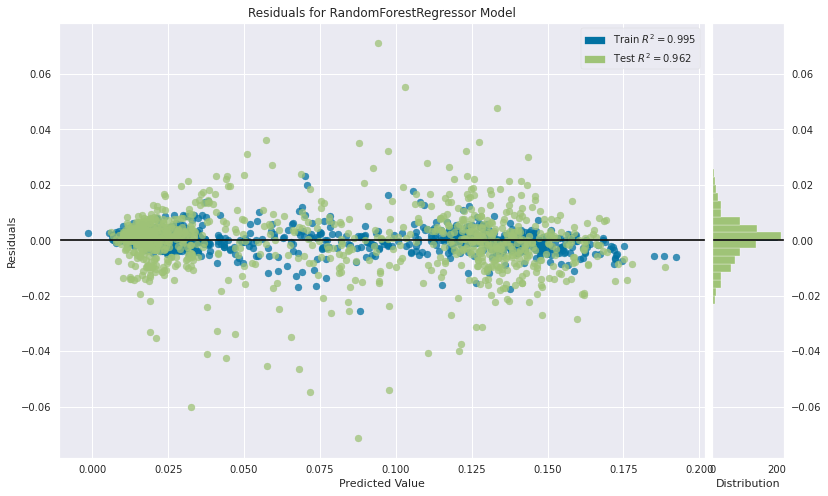

In [122]:
residuo(mdl,X_new2,X_val,y_train_tudo,y_test_tudo)
plt.show()

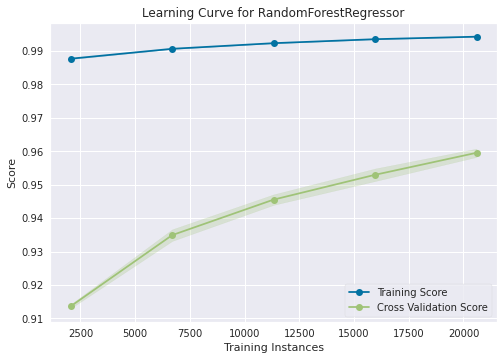

In [123]:
visualizer = LearningCurve(mdl, scoring='r2')
visualizer.fit(X_train_tudo, y_train_tudo.squeeze())        # Fit the data to the visualizer
visualizer.show()  

## **ML**

### nadal_1_esq_100_tudo

In [129]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFwe, f_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsCV
from sklearn.pipeline import make_pipeline, make_union
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures
from tpot.builtins import StackingEstimator
from sklearn.preprocessing import FunctionTransformer
from copy import copy
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from xgboost import XGBRegressor
from tpot.export_utils import set_param_recursive

In [130]:
# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = nadal_1_esq_100_tudo
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: -5.169772883238908e-05
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=SGDRegressor(alpha=0.0, eta0=0.01, fit_intercept=True, l1_ratio=0.25, learning_rate="invscaling", loss="squared_loss", penalty="elasticnet", power_t=0.1)),
    StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=False, max_features=0.8, min_samples_leaf=5, min_samples_split=17, n_estimators=100)),
    RandomForestRegressor(bootstrap=True, max_features=0.7500000000000001, min_samples_leaf=11, min_samples_split=13, n_estimators=100)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

In [131]:
metric(testing_target,results)

MSE:3.9658410696598195e-05 
MAE:0.004293214988589535 
R2:0.9875161054956932


In [132]:
from yellowbrick.regressor import residuals_plot

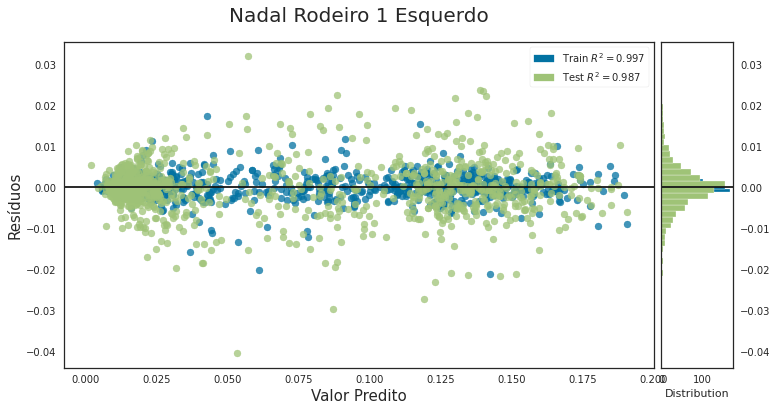

In [161]:
plt.figure(figsize=(12,6))
visualizer = residuals_plot(exported_pipeline,training_features[0:1000], training_target.squeeze()[0:1000],testing_features[0:1000], testing_target.squeeze()[0:1000],show=False)
plt.title('Nadal Rodeiro 1 Esquerdo',fontsize=20,pad=20)
plt.ylabel('Resíduos',fontsize=15)
plt.xlabel('Valor Predito',fontsize=15)
plt.savefig('img/residuo_r1_esq.png')

In [133]:
predict = exported_pipeline.predict(x_tudo_100)

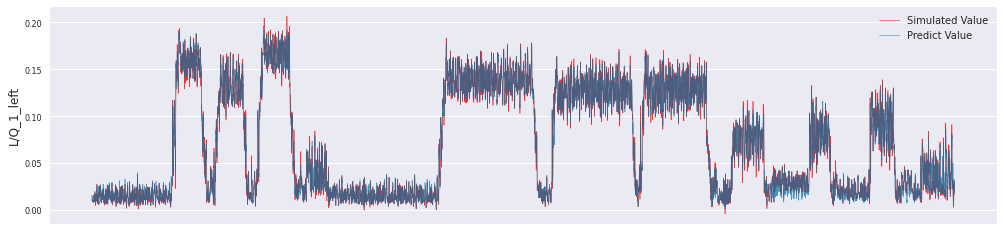

In [134]:
i = 0
sns.set_style('darkgrid')
plt.figure(figsize=(17,4))
plt.plot(y_nadal_1_esq_100,linewidth=0.6,alpha=0.8,color='red',label="Simulated Value")
plt.plot(predict,linewidth=0.6,alpha=0.7,label="Predict Value")
plt.ylabel('L/Q_1_left', fontsize=12)
locs, labels = plt.xticks()
# plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.3s s'))
plt.xticks([])
plt.tick_params(axis='y', which='major', labelsize=8)
plt.legend(fontsize=10)
plt.savefig('img2/y_nadal_1_esq_dif')
plt.show()

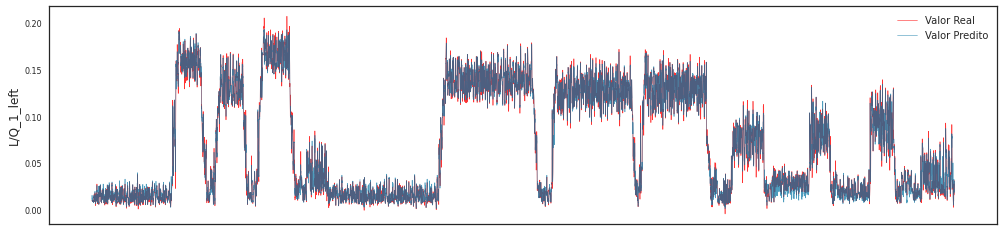

In [135]:
i = 0
sns.set_style('white')
plt.figure(figsize=(17,4))
plt.plot(y_nadal_1_esq_100,linewidth=0.6,alpha=0.8,color='red',label="Valor Real")
plt.plot(predict,linewidth=0.6,alpha=0.7,label="Valor Predito")
plt.ylabel('L/Q_1_left', fontsize=12)
locs, labels = plt.xticks()
plt.xticks([])
plt.tick_params(axis='y', which='major', labelsize=8)
plt.legend(fontsize=10)
# plt.savefig('y_nadal_1_esq_dif')
plt.show()

### nadal_1_dir_100_tudo

In [136]:
# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = nadal_1_dir_100_tudo
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: -5.357629313730247e-05
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=RandomForestRegressor(bootstrap=True, max_features=0.8, min_samples_leaf=2, min_samples_split=16, n_estimators=100)),
    XGBRegressor(learning_rate=0.5, max_depth=4, min_child_weight=3, n_estimators=100, nthread=1, objective="reg:squarederror", subsample=0.45)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

In [137]:
metric(testing_target,results)

MSE:4.312780518030225e-05 
MAE:0.004415298519140694 
R2:0.9861485515607741


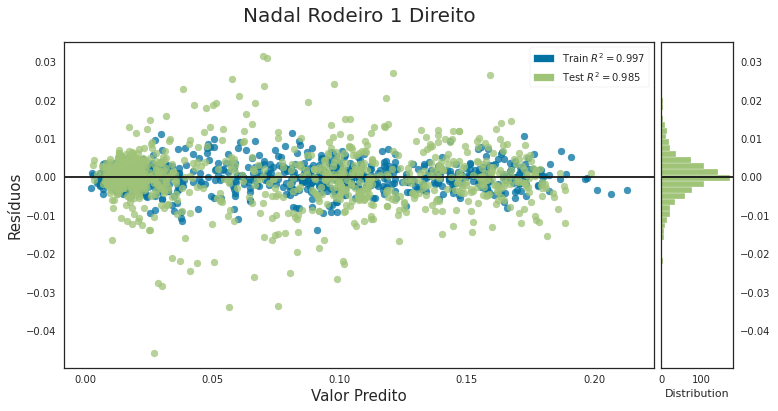

In [138]:
plt.figure(figsize=(12,6))
visualizer = residuals_plot(exported_pipeline,training_features[0:1000], training_target.squeeze()[0:1000],testing_features[0:1000], testing_target.squeeze()[0:1000],show=False)
#visualizer.show()
plt.title('Nadal Rodeiro 1 Direito',fontsize=20,pad=20)
plt.ylabel('Resíduos',fontsize=15)
plt.xlabel('Valor Predito',fontsize=15)
plt.savefig('img/residuo_r1_dir.png')

In [139]:
predict = exported_pipeline.predict(x_tudo_100)

In [149]:
y_max = list(y_nadal_1_dir_100)

In [150]:
y_max.index(0.24322880804538727)

15100

In [151]:
y_nadal_1_dir_100[15100]

0.24322880804538727

In [195]:
s= list(y_nadal_1_dir_100[14500:15600])
d= (predict[14500:15600])

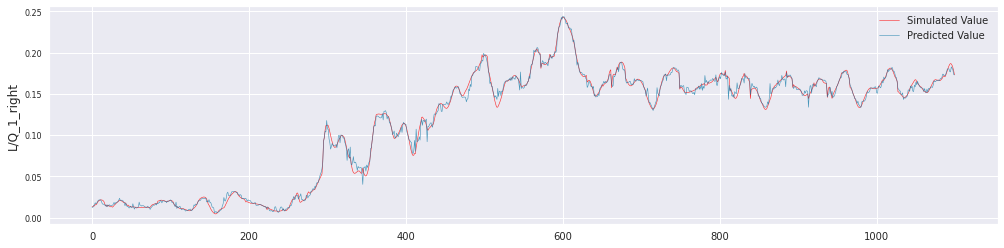

In [202]:
i = 0
sns.set_style('darkgrid')
plt.figure(figsize=(17,4))
plt.plot(s,linewidth=0.6,alpha=0.8,color='red',label="Simulated Value")
plt.plot(d,linewidth=0.6,alpha=0.7,label="Predicted Value")
plt.ylabel('L/Q_1_right', fontsize=12)
locs, labels = plt.xticks()
# plt.xticks([])
plt.tick_params(axis='y', which='major', labelsize=8)
plt.legend(fontsize=10)
plt.savefig('img2/pico')
plt.show()

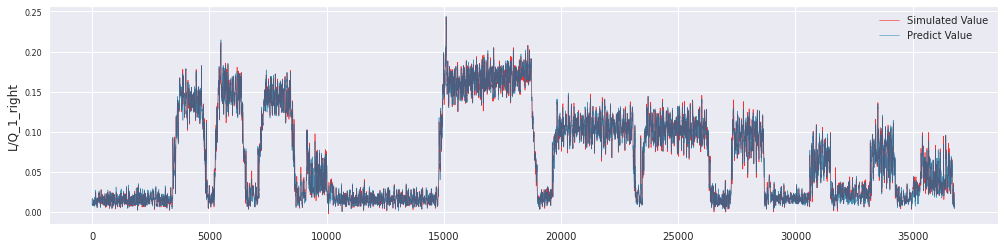

In [207]:
i = 0
sns.set_style('darkgrid')
plt.figure(figsize=(17,4))
plt.plot(y_nadal_1_dir_100,linewidth=0.6,alpha=0.8,color='red',label="Simulated Value")
plt.plot(predict,linewidth=0.6,alpha=0.7,label="Predict Value")
plt.ylabel('L/Q_1_right', fontsize=12)
locs, labels = plt.xticks()
# plt.xticks([])
plt.tick_params(axis='y', which='major', labelsize=8)
plt.legend(fontsize=10)
# plt.savefig('img2/y_nadal_1_dir_dif')
plt.show()

### nadal_2_dir_100_tudo

In [238]:
# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = nadal_2_dir_100_tudo
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Average CV score on the training set was:-2.2468115842034504e-05
exported_pipeline = ExtraTreesRegressor(bootstrap=False, max_features=0.7500000000000001, min_samples_leaf=2, min_samples_split=6, n_estimators=100)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

In [239]:
metric(testing_target,results)

MSE:1.717266044496387e-05 
MAE:0.002622519639350222 
R2:0.9834721815927315


In [240]:
predict = exported_pipeline.predict(x_tudo_100)

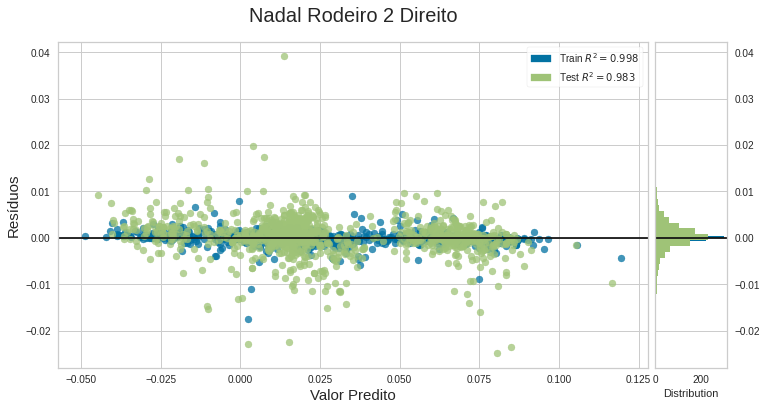

In [129]:
plt.figure(figsize=(12,6))
visualizer = residuals_plot(exported_pipeline,training_features[0:1000], training_target.squeeze()[0:1000],testing_features[0:1000], testing_target.squeeze()[0:1000],show=False)
plt.title('Nadal Rodeiro 2 Direito',fontsize=20,pad=20)
plt.ylabel('Resíduos',fontsize=15)
plt.xlabel('Valor Predito',fontsize=15)
plt.savefig('img/residuo_r2_dir.png')

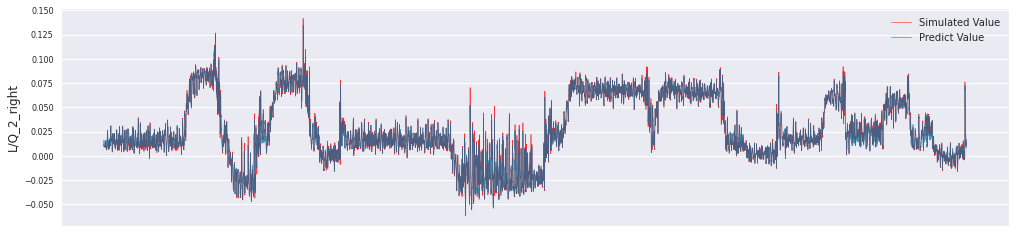

In [241]:
i = 0
sns.set_style('darkgrid')
plt.figure(figsize=(17,4))
plt.plot(y_nadal_2_dir_100,linewidth=0.6,alpha=0.8,color='red',label="Simulated Value")
plt.plot(predict,linewidth=0.7,alpha=0.7,label="Predict Value")
plt.ylabel('L/Q_2_right', fontsize=12)
locs, labels = plt.xticks()
plt.xticks([])
plt.tick_params(axis='y', which='major', labelsize=8)
plt.legend(fontsize=10)
plt.savefig('img2/y_nadal_2_dir_dif')
plt.show()

### nadal_2_esq_100_tudo

In [232]:
# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = nadal_2_esq_100_tudo
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Average CV score on the training set was:-2.1358744330866116e-05
exported_pipeline = RandomForestRegressor(bootstrap=False, max_features=0.6500000000000001, min_samples_leaf=4, min_samples_split=5, n_estimators=100)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

In [233]:
metric(testing_target,results)

MSE:1.6663978532640763e-05 
MAE:0.002636541902883056 
R2:0.9855502574865697


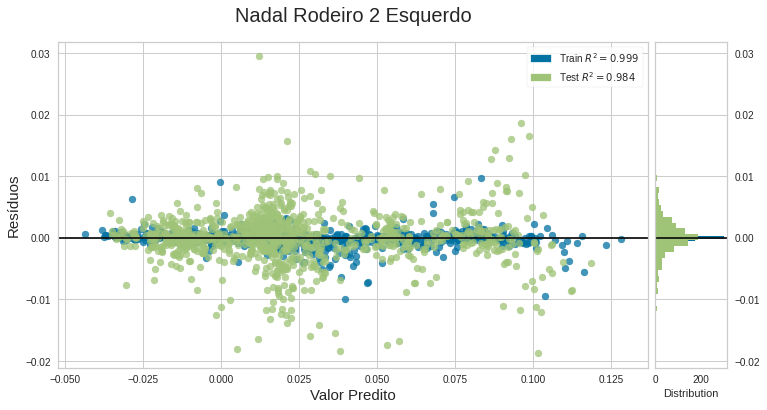

In [133]:
plt.figure(figsize=(12,6))
visualizer = residuals_plot(exported_pipeline,training_features[0:1000], training_target.squeeze()[0:1000],testing_features[0:1000], testing_target.squeeze()[0:1000],show=False)

plt.title('Nadal Rodeiro 2 Esquerdo',fontsize=20,pad=20)
plt.ylabel('Resíduos',fontsize=15)
plt.xlabel('Valor Predito',fontsize=15)
plt.savefig('img/residuo_r2_esq.png')

In [234]:
predict = exported_pipeline.predict(x_tudo_100)

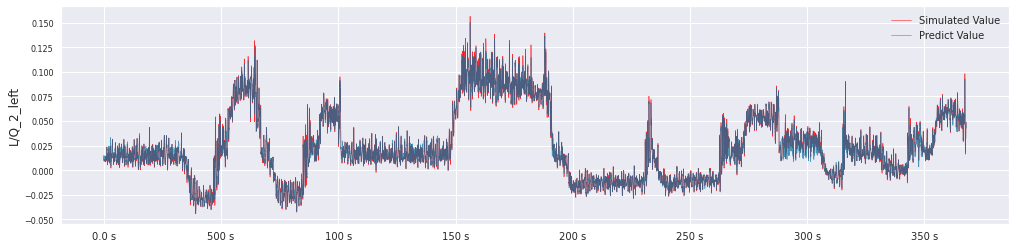

In [237]:
i = 0
sns.set_style('darkgrid')
plt.figure(figsize=(17,4))
plt.plot(y_nadal_2_esq_100,linewidth=0.6,alpha=0.8,color='red',label="Simulated Value")
plt.plot(predict,linewidth=0.6,alpha=0.7,label="Predict Value")
plt.ylabel('L/Q_2_left', fontsize=12)
locs, labels = plt.xticks()
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.3s s'))
# plt.xticks([])
plt.tick_params(axis='y', which='major', labelsize=8)
plt.legend(fontsize=10)
plt.savefig('img2/y_nadal_2_esq_dif')
plt.show()

### nadal_1_esq_1_tudo

In [119]:
# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = nadal_1_esq_1_tudo
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Average CV score on the training set was:-0.0001621298136335855
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=LassoLarsCV(normalize=True)),
    XGBRegressor(learning_rate=0.1, max_depth=7, min_child_weight=4, n_estimators=100, nthread=1, objective="reg:squarederror", subsample=0.55)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)



In [120]:
metric(testing_target,results)

MSE:0.00021191480271066823 
MAE:0.009182219889581851 
R2:0.9370282709645452


### nadal_1_dir_1_tudo

In [121]:
# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = nadal_1_dir_1_tudo
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Average CV score on the training set was:-0.00018869491726135497
exported_pipeline = make_pipeline(
    MinMaxScaler(),
    KNeighborsRegressor(n_neighbors=7, p=1, weights="distance")
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

In [122]:
metric(testing_target,results)

MSE:0.00018444618847566463 
MAE:0.009322570267695597 
R2:0.9314227345993223


### nadal_2_esq_1_tudo

In [123]:
# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = nadal_2_esq_1_tudo
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Average CV score on the training set was:-0.00012219165355601536
exported_pipeline = make_pipeline(
    SelectFwe(score_func=f_regression, alpha=0.015),
    RandomForestRegressor(bootstrap=False, max_features=0.6500000000000001, min_samples_leaf=13, min_samples_split=15, n_estimators=100)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


In [124]:
metric(testing_target,results)

MSE:0.00010772537985036613 
MAE:0.0073180958438958 
R2:0.8925171077369357


### nadal_2_dir_1_tudo

In [125]:
# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = nadal_2_dir_1_tudo
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Average CV score on the training set was:-0.00011668483556100456
exported_pipeline = make_pipeline(
    make_union(
        FunctionTransformer(copy),
        FunctionTransformer(copy)
    ),
    GradientBoostingRegressor(alpha=0.99, learning_rate=0.1, loss="ls", max_depth=2, max_features=0.7000000000000001, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.8)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

In [126]:
metric(testing_target,results)

MSE:9.716249445229758e-05 
MAE:0.007489914327968855 
R2:0.9111163357157228


### nadal_1_esq_100_no

In [127]:
tpot_data = nadal_1_esq_100_tudo_no
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Average CV score on the training set was:-3.2377907214723986e-06
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=AdaBoostRegressor(learning_rate=0.1, loss="linear", n_estimators=100)),
    PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
    GradientBoostingRegressor(alpha=0.99, learning_rate=0.1, loss="ls", max_depth=10, max_features=0.45, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.9500000000000001)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


In [128]:
metric(testing_target,results)

MSE:2.214866777491869e-06 
MAE:0.00037317432474539544 
R2:0.9993666634349115


### nadal_1_dir_100_no

In [129]:
tpot_data = nadal_1_dir_100_tudo_no
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Average CV score on the training set was:-3.361183472872164e-06
exported_pipeline = make_pipeline(
    RobustScaler(),
    SelectFwe(score_func=f_regression, alpha=0.015),
    RandomForestRegressor(bootstrap=False, max_features=0.6500000000000001, min_samples_leaf=4, min_samples_split=5, n_estimators=100)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


In [130]:
metric(testing_target,results)

MSE:2.4813949822705884e-06 
MAE:0.00039554405010177056 
R2:0.9992524396274383


### nadal_2_esq_100_no

In [133]:
tpot_data = nadal_2_esq_100_tudo_no
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Average CV score on the training set was:-1.1773447483883598e-06
exported_pipeline = make_pipeline(
    MaxAbsScaler(),
    StackingEstimator(estimator=LinearSVR(C=0.0001, dual=True, epsilon=0.01, loss="epsilon_insensitive", tol=0.01)),
    RandomForestRegressor(bootstrap=False, max_features=0.45, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


In [134]:
metric(testing_target,results)

MSE:1.5088407822283492e-05 
MAE:0.0024675651119713034 
R2:0.9869164733054253


### nadal_2_dir_100_no

In [137]:
tpot_data = nadal_2_dir_100_tudo_no
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Average CV score on the training set was:-1.3923248280416084e-06
exported_pipeline = make_pipeline(
    SelectPercentile(score_func=f_regression, percentile=81),
    PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
    ExtraTreesRegressor(bootstrap=False, max_features=0.9000000000000001, min_samples_leaf=2, min_samples_split=8, n_estimators=100)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

In [138]:
metric(testing_target,results)

MSE:1.2257920076482706e-06 
MAE:0.00026039425257467515 
R2:0.9988099025762772


### nadal_1_esq_100_real

In [164]:
tpot_data = nadal_1_esq_100_real
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: -0.00010168633825228294
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=False, max_features=1.0, min_samples_leaf=3, min_samples_split=2, n_estimators=100)),
    XGBRegressor(learning_rate=0.1, max_depth=7, min_child_weight=17, n_estimators=100, nthread=1, objective="reg:squarederror", subsample=0.2)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


In [165]:
metric(testing_target,results)

MSE:8.584970872416716e-05 
MAE:0.00593262962041078 
R2:0.9729757524794128


### nadal_1_dir_100_real

In [166]:
tpot_data = nadal_1_dir_100_real
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: -0.00010406651767709946
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=RandomForestRegressor(bootstrap=False, max_features=0.8, min_samples_leaf=2, min_samples_split=6, n_estimators=100)),
    XGBRegressor(learning_rate=0.1, max_depth=6, min_child_weight=15, n_estimators=100, nthread=1, objective="reg:squarederror", subsample=0.35000000000000003)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


In [167]:
metric(testing_target,results)

MSE:8.887964759801491e-05 
MAE:0.005448453122096013 
R2:0.9714543355300918


### nadal_2_dir_100_real

In [168]:
tpot_data = nadal_2_dir_100_real
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Average CV score on the training set was:-3.3352606959354706e-05
exported_pipeline = make_pipeline(
    StandardScaler(),
    StackingEstimator(estimator=LassoLarsCV(normalize=True)),
    RandomForestRegressor(bootstrap=False, max_features=0.45, min_samples_leaf=2, min_samples_split=4, n_estimators=100)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


In [169]:
metric(testing_target,results)

MSE:2.6226424491333762e-05 
MAE:0.0031387558006970785 
R2:0.9747583909404194


### nadal_2_esq_100_real

In [171]:
tpot_data = nadal_2_esq_100_real
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Average CV score on the training set was:-3.074279440717191e-05
exported_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
    StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=False, max_features=0.6500000000000001, min_samples_leaf=2, min_samples_split=15, n_estimators=100)),
    RandomForestRegressor(bootstrap=False, max_features=0.3, min_samples_leaf=10, min_samples_split=14, n_estimators=100)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

In [172]:
metric(testing_target,results)

MSE:2.4727452089453705e-05 
MAE:0.0031940505914538537 
R2:0.9785582227553933


### nadal_1_esq_1_real

In [173]:
tpot_data = nadal_1_esq_1_real
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Average CV score on the training set was:-0.00033966251441405266
exported_pipeline = RandomForestRegressor(bootstrap=True, max_features=0.8500000000000001, min_samples_leaf=1, min_samples_split=5, n_estimators=100)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

In [174]:
metric(testing_target,results)

MSE:0.00023591482200762366 
MAE:0.011133750590230999 
R2:0.9298965241838496


### nadal_1_dir_1_real

In [175]:
tpot_data = nadal_1_dir_1_real
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Average CV score on the training set was:-0.00028767683774130217
exported_pipeline = make_pipeline(
    make_union(
        FunctionTransformer(copy),
        FunctionTransformer(copy)
    ),
    ExtraTreesRegressor(bootstrap=False, max_features=0.9500000000000001, min_samples_leaf=3, min_samples_split=3, n_estimators=100)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


In [176]:
metric(testing_target,results)

MSE:0.0001757443641042529 
MAE:0.009702763772264915 
R2:0.9346580810400383


### nadal_2_esq_1_real

In [178]:
tpot_data = nadal_2_esq_1_real
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Average CV score on the training set was:-0.00010137174095478424
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=LassoLarsCV(normalize=False)),
    ExtraTreesRegressor(bootstrap=False, max_features=0.6500000000000001, min_samples_leaf=3, min_samples_split=13, n_estimators=100)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

In [179]:
metric(testing_target,results)

MSE:0.00010294575451991108 
MAE:0.006911020864859717 
R2:0.8972859742302792


### nadal_2_dir_1_real

In [180]:
tpot_data = nadal_2_dir_1_real
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Average CV score on the training set was:-0.00012067135002815186
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=LassoLarsCV(normalize=True)),
    RandomForestRegressor(bootstrap=False, max_features=0.3, min_samples_leaf=3, min_samples_split=14, n_estimators=100)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

In [181]:
metric(testing_target,results)

MSE:9.113371273364689e-05 
MAE:0.006234422265372059 
R2:0.9166314288938505


### nadal_1_esq_100_no_real

In [182]:
tpot_data = nadal_1_esq_100_no_real
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Average CV score on the training set was:-7.702277646646968e-06
exported_pipeline = make_pipeline(
    make_union(
        StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=False, max_features=0.5, min_samples_leaf=9, min_samples_split=15, n_estimators=100)),
        FunctionTransformer(copy)
    ),
    StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=True, max_features=0.6500000000000001, min_samples_leaf=5, min_samples_split=8, n_estimators=100)),
    RandomForestRegressor(bootstrap=False, max_features=0.3, min_samples_leaf=3, min_samples_split=14, n_estimators=100)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


In [183]:
metric(testing_target,results)

MSE:5.100444016883751e-06 
MAE:0.0006291406031363643 
R2:0.9985415386031763


### nadal_1_dir_100_no_real

In [184]:
tpot_data = nadal_1_dir_100_no_real
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Average CV score on the training set was:-9.633506680048213e-06
exported_pipeline = RandomForestRegressor(bootstrap=False, max_features=0.7000000000000001, min_samples_leaf=2, min_samples_split=4, n_estimators=100)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

In [185]:
metric(testing_target,results)

MSE:7.549842512410065e-06 
MAE:0.0007203333617126352 
R2:0.99772548783177


### nadal_2_esq_100_no_real

In [187]:
tpot_data = nadal_2_esq_100_no_real
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Average CV score on the training set was:-3.3030070582937683e-06
exported_pipeline = make_pipeline(
    RobustScaler(),
    RandomForestRegressor(bootstrap=False, max_features=0.45, min_samples_leaf=2, min_samples_split=2, n_estimators=100)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


In [188]:
metric(testing_target,results)

MSE:2.6416915569525723e-06 
MAE:0.0004389467322467313 
R2:0.9973940536053193


### nadal_2_dir_100_no_real

In [191]:
tpot_data = nadal_2_dir_100_no_real
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Average CV score on the training set was:-3.3518091560089786e-06
exported_pipeline = RandomForestRegressor(bootstrap=False, max_features=0.8500000000000001, min_samples_leaf=1, min_samples_split=5, n_estimators=100)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


In [192]:
metric(testing_target,results)

MSE:3.149954139156466e-06 
MAE:0.00043306203631441877 
R2:0.9969417712936086
